In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format",lambda x : "%.2f" %x)

In [129]:
import os
os.getcwd()

'C:\\Users\\teach\\Downloads'

# STEP-1 Reading the dataset

In [3]:

zomato_real=pd.read_csv("zomato (5).csv",encoding="latin-1",usecols=range(17))


In [4]:
zomato_real.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### STEP-2  Looking at the information about the dataset, datatypes of the coresponding columns and missing values

In [5]:
zomato_real.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56250 entries, 0 to 56249
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          56200 non-null  object
 1   address                      56235 non-null  object
 2   name                         56236 non-null  object
 3   online_order                 56234 non-null  object
 4   book_table                   56194 non-null  object
 5   rate                         48414 non-null  object
 6   votes                        56174 non-null  object
 7   phone                        54956 non-null  object
 8   location                     56128 non-null  object
 9   rest_type                    55914 non-null  object
 10  dish_liked                   28049 non-null  object
 11  cuisines                     56049 non-null  object
 12  approx_cost(for two people)  55745 non-null  object
 13  reviews_list                 56

# STEP-3 Find and Remove the Duplicate rows

In [6]:

zomato_real.duplicated().sum()



214

In [7]:
zomato_real.drop_duplicates(inplace=True)

In [8]:
zomato_real.reset_index(inplace=True,drop=True)

# STEP-4 Find NaN values

In [9]:
zomato_real.isnull().mean()*100

url                            0.09
address                        0.02
name                           0.01
online_order                   0.02
book_table                     0.09
rate                          13.97
votes                          0.12
phone                          2.30
location                       0.21
rest_type                      0.59
dish_liked                    50.31
cuisines                       0.32
approx_cost(for two people)    0.86
reviews_list                   0.28
menu_item                      8.09
listed_in(type)                8.12
listed_in(city)                8.16
dtype: float64

# STEP-5 Reading columns name

In [10]:

zomato_real.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# STEP-6 Changing the columns name,if needed

In [11]:

zomato_real = zomato_real.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato_real.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

# STEP-7 FEATURE CLEANSING 

In [12]:
zomato=zomato_real.copy()

In [13]:
zomato["book_table"].unique()

array(['Yes', 'No', " 'RATED\\n  Amazing cafe", ...,
       ' ""RATED\\n  A decent place to have some traditional oriental cuisine. We were craving for some kick-ass noodles. While we did get the noodles',
       ' but cud be a bit less spicy... otherwise was grt',
       'VR Bengaluru\\nBeen here a few times '], dtype=object)

In [14]:
a=[]
for i,j in enumerate(zomato["book_table"]):
    if j=="Yes" or j=="No":
        pass
    else:
        a.append(i)

In [15]:
len(a)

4319

In [16]:
zomato.iloc[a].head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
9,e are a bit pricey. They can improve on their ...,things tend to get smokey due to the sizzlers...,service was sluggish as they took too long to...,('Rated 4.0','RATED\n Amazing cafe,\nTop floor,no outdoor seating.\nFood is delicious,though the quantity is okayish.\nI ordered 6 ...,a nice place to give a try.'),('Rated 1.0','RATED\n Located opposite to wildcraft store...,we had nachos cheese salsa which was okay. We...,it turned out worse than the garlic bread. Th...,('Rated 3.0',"""""RATED\n Service is little slow and food is...",parking facility I could not locate. Staff ca...,it was little difficult to converse. Overall ...
33,ay for me to have egg in my possession. Who ar...,('Rated 2.0','RATED\n not that much worth'),('Rated 2.0','RATED\n Delay in delivery'),('Rated 1.0',"""""RATED\n Not good and gravy not sufficient ...",('Rated 1.0','RATED\n it was not worth the money'),('Rated 4.0','RATED\n Very nice loved it and ur chat supp...,('Rated 3.0','RATED\n one item wasnt delivered'),('Rated 1.0',"""""RATED\n too much of salt in in mutton burg...","don't expect too much from this place.."""")",('Rated 1.0'


In [17]:
zomato_new=zomato.drop(a,axis=0)

In [18]:
zomato_new.reset_index(drop=True,inplace=True)

In [19]:
zomato_new["book_table"].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
zomato_new["cost"].unique()

array(['800', '300', '600', '700+', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '10,00', '12,00', '1500+', '1,300', '350+', '1,000', '199',
       '1,500', '80', '1,100', '160', '1,600', '700', '230', '130', '50',
       '190', '1,700', nan, '1,400', '180', '1,350', '2,200', '2,000',
       '1,800', '1,900', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '28,00', '120', '1,450', '469', '70', '3,200', '60', '560', '240',
       '360', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140'], dtype=object)

In [21]:
zomato_new["cost"]=zomato_new["cost"].apply(lambda x:x.replace(',',''))

AttributeError: 'float' object has no attribute 'replace'

In [68]:
zomato_new["cost"]=zomato_new["cost"].astype(str)
zomato_new["cost"]=zomato_new["cost"].apply(lambda x:x.replace(',',''))
zomato_new["cost"]=zomato_new["cost"].apply(lambda x:x.strip('+'))
zomato_new["cost"]=zomato_new["cost"].astype("float")

In [69]:
zomato_new["cost"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [23]:
zomato_new["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
zomato_new["rate"]=zomato_new["rate"].astype(str)
zomato_new["rate"]=zomato_new["rate"].apply(lambda x: x[0:3])

In [25]:
zomato_new["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '-', '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [26]:
zomato_new["rate"]=zomato_new["rate"].replace("-",np.nan)
zomato_new["rate"]=zomato_new["rate"].replace("NEW",np.nan)
zomato_new["rate"]=zomato_new["rate"].replace('nan',np.nan)

In [27]:
zomato_new["rate"]=zomato_new["rate"].astype("float")

In [28]:
zomato_new["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [29]:
zomato_new["votes"].unique()

array(['775', '787', '918', ..., '4957', '2382', '843'], dtype=object)

In [30]:
for i,j in enumerate(zomato_new["votes"]):
    try:
        if type(float(j))==float:
            pass
    except :
        print(i,j)
    

1372 1,000


In [31]:
zomato_new["votes"]=zomato_new["votes"].astype("str")

In [32]:
zomato_new["votes"]=zomato_new["votes"].apply(lambda x : x.replace(",",""))

In [33]:
zomato_new["votes"]=zomato_new["votes"].astype("int")

In [34]:
zomato_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rate          41665 non-null  float64
 6   votes         51717 non-null  int32  
 7   phone         50509 non-null  object 
 8   location      51696 non-null  object 
 9   rest_type     51490 non-null  object 
 10  dish_liked    23639 non-null  object 
 11  cuisines      51672 non-null  object 
 12  cost          51371 non-null  object 
 13  reviews_list  51717 non-null  object 
 14  menu_item     47356 non-null  object 
 15  type          47356 non-null  object 
 16  city          47356 non-null  object 
dtypes: float64(1), int32(1), object(15)
memory usage: 6.5+ MB


# STEP-8 Deleting Unnnecessary Columns

In [35]:
zomato_new=zomato_new.drop(["name",'url',"dish_liked",'phone','address','reviews_list','menu_item','location'],axis=1) 

In [36]:
zomato_new.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.10,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.10,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.80,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.70,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.80,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [142]:
zomato_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int32  
 5   rest_type     51490 non-null  object 
 6   cuisines      51672 non-null  object 
 7   cost          51371 non-null  float64
 8   type          47356 non-null  object 
 9   city          47356 non-null  object 
dtypes: float64(2), int32(1), object(7)
memory usage: 3.7+ MB


In [37]:
zomato_new=zomato_new.reset_index(drop=True)

In [70]:
zomato_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int32  
 5   rest_type     51490 non-null  object 
 6   cuisines      51672 non-null  object 
 7   cost          51371 non-null  float64
 8   type          47356 non-null  object 
 9   city          47356 non-null  object 
dtypes: float64(2), int32(1), object(7)
memory usage: 3.7+ MB


# STEP-9 Data Visualization

### A) Restaurants delivering Online or not

In [38]:
zomato_new["online_order"].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

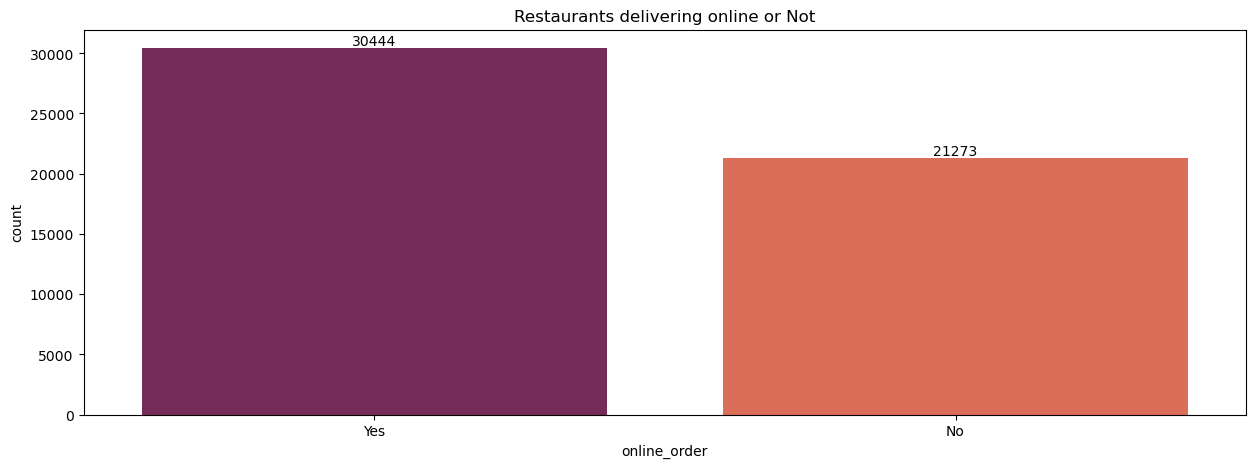

In [39]:
a=plt.figure(figsize=(15,5))
ax=sns.countplot(zomato_new,x='online_order',palette="rocket")
plt.title('Restaurants delivering online or Not')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### B) Restaurants allowing table booking or not

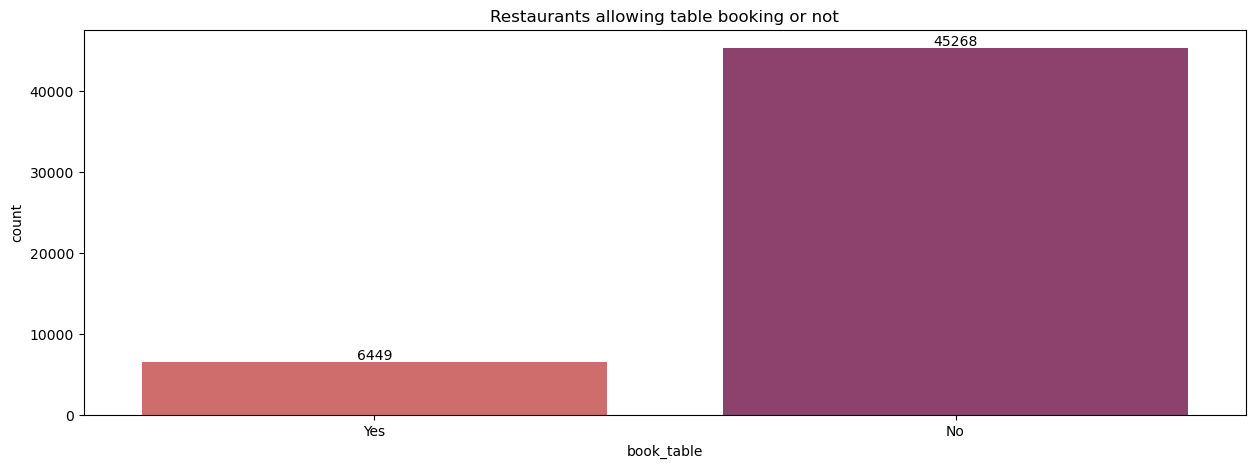

In [40]:
b=plt.figure(figsize=(15,5))
ax=sns.countplot(zomato_new,x='book_table',palette="flare")
plt.title('Restaurants allowing table booking or not')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

#### Table booking Rate vs Normal Rate

In [41]:
Y = pd.crosstab(zomato_new['rate'], zomato_new['book_table'])


In [42]:
Y

book_table,No,Yes
rate,,
1.80,5,0
2.00,11,0
2.10,24,0
2.20,13,13
2.30,51,0
2.40,70,0
2.50,99,2
2.60,256,4
2.70,303,4


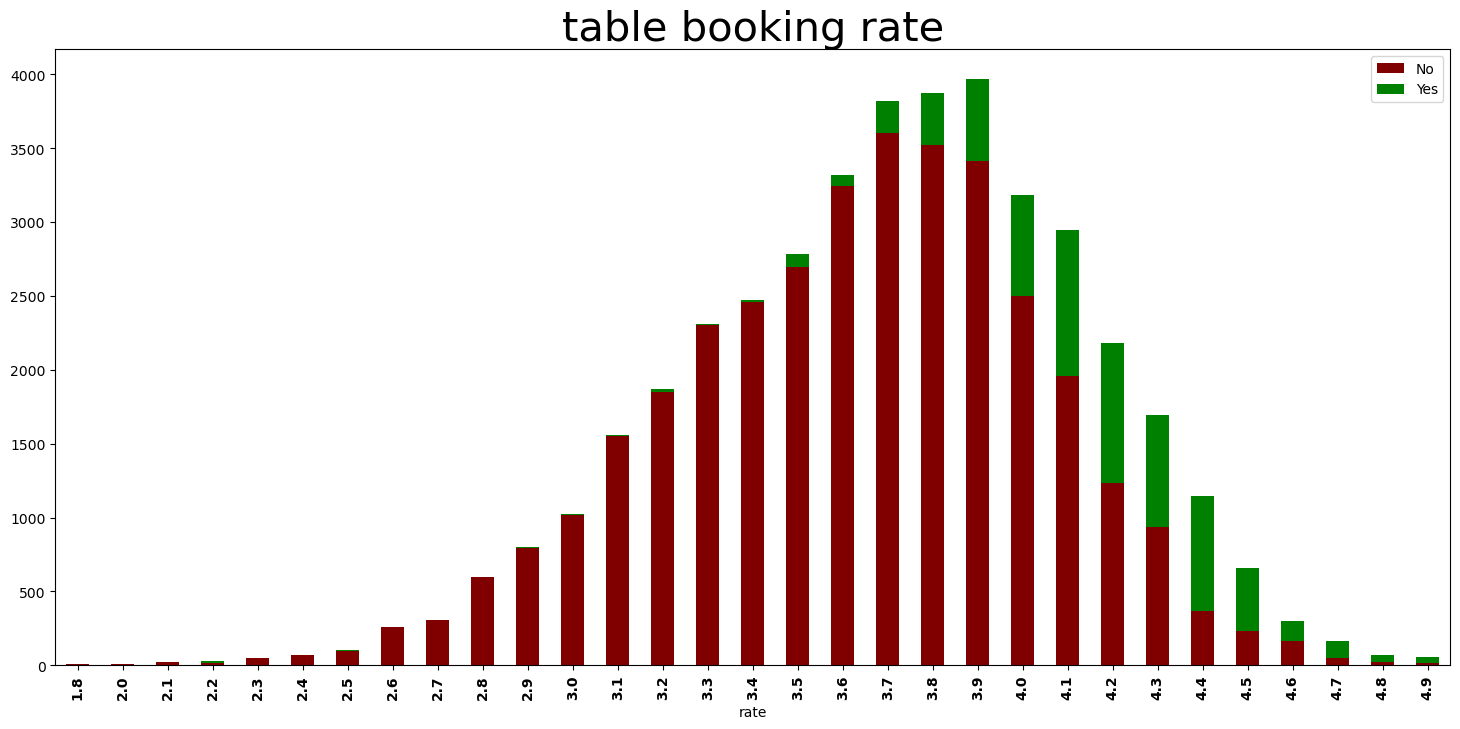

In [43]:
Y.plot(kind = 'bar', stacked = True,color=['maroon','green'],figsize=(18,8))
plt.title('table booking rate', fontweight = 30, fontsize = 30)
plt.xticks(fontsize=10,fontweight='bold')
plt.legend(loc="upper right")
plt.show()

#### Online Order Rate vs Normal Rate

In [44]:
Y = pd.crosstab(zomato_new['rate'], zomato_new['online_order'])


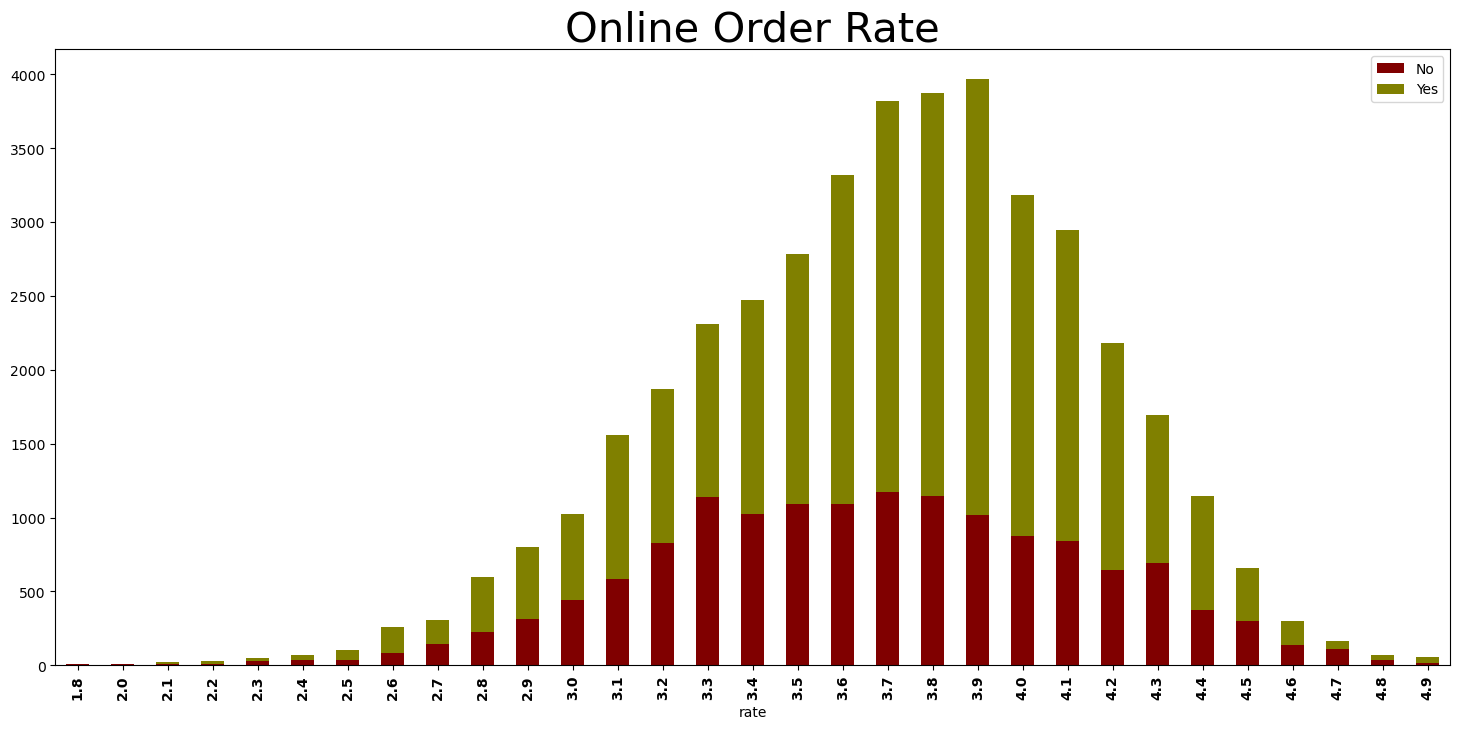

In [45]:
Y.plot(kind = 'bar', stacked = True,color=['maroon','olive'],figsize=(18,8))
plt.title('Online Order Rate', fontweight = 30, fontsize = 30)
plt.xticks(fontsize=10,fontweight='bold')
plt.legend(loc="upper right")
plt.show()

#### Location

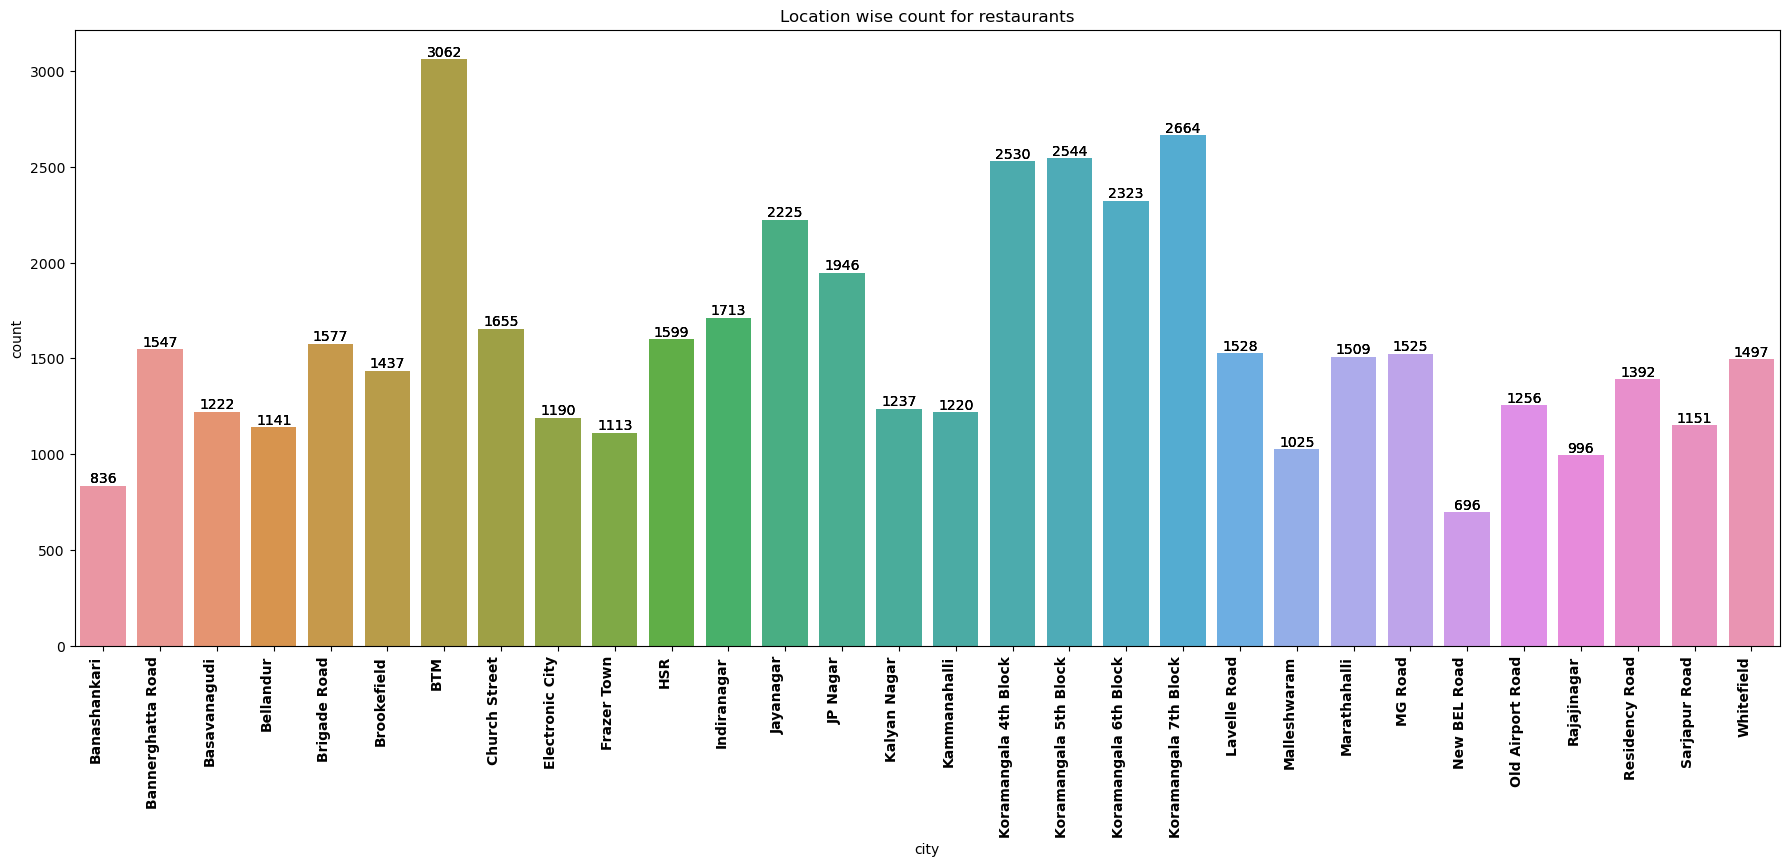

In [152]:
d=plt.figure(figsize=(22,8))

ax=sns.countplot(zomato_new,x='city')
sns.countplot(zomato_new,x='city').set_xticklabels(sns.countplot(zomato_new,x='city').get_xticklabels(), rotation=90, ha="right",fontweight='bold')
plt.title('Location wise count for restaurants')
for container in ax.containers:
    ax.bar_label(container)


plt.show()

#### Location and Rating

In [48]:
zomato_new['city'].value_counts().head(10).index

Index(['BTM', 'Koramangala 7th Block', 'Koramangala 5th Block',
       'Koramangala 4th Block', 'Koramangala 6th Block', 'Jayanagar',
       'JP Nagar', 'Indiranagar', 'Church Street', 'HSR'],
      dtype='object')

In [50]:
zom_loc=[i for i in zomato_new['city'].value_counts().head(10).index ]

In [51]:
zom_loc

['BTM',
 'Koramangala 7th Block',
 'Koramangala 5th Block',
 'Koramangala 4th Block',
 'Koramangala 6th Block',
 'Jayanagar',
 'JP Nagar',
 'Indiranagar',
 'Church Street',
 'HSR']

In [52]:
zom_top_loc=zomato_new.loc[zomato_new["city"].isin(zom_loc)]

In [53]:
zom_top_loc

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
8261,The Globe Grub,No,Yes,4.40,201,Casual Dining,"Continental, North Indian, Asian, Italian","1,300",Buffet,BTM
8263,"3B's - Buddies, Bar & Barbecues",No,Yes,4.40,1149,"Casual Dining, Bar","North Indian, Mediterranean, European, BBQ","1,100",Buffet,BTM
8264,Savoury Restaurant,Yes,No,3.90,420,Casual Dining,"Arabian, North Indian, Chinese, Fast Food",800,Buffet,BTM
8265,Sankranthi Veg Restaurant,Yes,No,3.00,102,Casual Dining,"South Indian, North Indian, Chinese",600,Buffet,BTM
8266,Aaccord Restaurant,No,No,NaN,0,Casual Dining,"Continental, North Indian, South Indian",700,Buffet,BTM
...,...,...,...,...,...,...,...,...,...,...
37657,Zanzibar - Davanam Sarovar Portico Suites,No,No,3.50,39,Bar,Finger Food,"1,200",Pubs and bars,Koramangala 7th Block
37658,Skywalk Restobar,No,No,3.30,5,"Casual Dining, Bar","North Indian, South Indian",700,Pubs and bars,Koramangala 7th Block
37659,Stories - The Brew Chapter,No,No,NaN,0,Bar,"Continental, Chinese, North Indian","1,200",Pubs and bars,Koramangala 7th Block
37660,Shiva's Bar And Restaurant,No,No,NaN,0,"Bar, Casual Dining","South Indian, North Indian, Fast Food",800,Pubs and bars,Koramangala 7th Block


In [54]:
loc_plt=pd.crosstab(zom_top_loc['rate'],zom_top_loc['city'])
loc_plt

city,BTM,Church Street,HSR,Indiranagar,JP Nagar,Jayanagar,Koramangala 4th Block,Koramangala 5th Block,Koramangala 6th Block,Koramangala 7th Block
rate,,,,,,,,,,
2.00,0,2,0,0,0,0,0,0,0,0
2.10,0,1,0,0,0,0,0,0,0,0
2.20,0,3,0,2,1,0,0,0,0,0
2.30,3,1,3,0,3,0,1,2,1,1
2.40,2,0,5,6,2,0,1,2,0,2
2.50,6,4,2,5,2,6,3,3,4,4
2.60,18,3,16,5,13,11,11,11,10,11
2.70,18,5,6,11,13,18,11,9,8,12
2.80,29,17,23,29,15,18,31,23,27,19


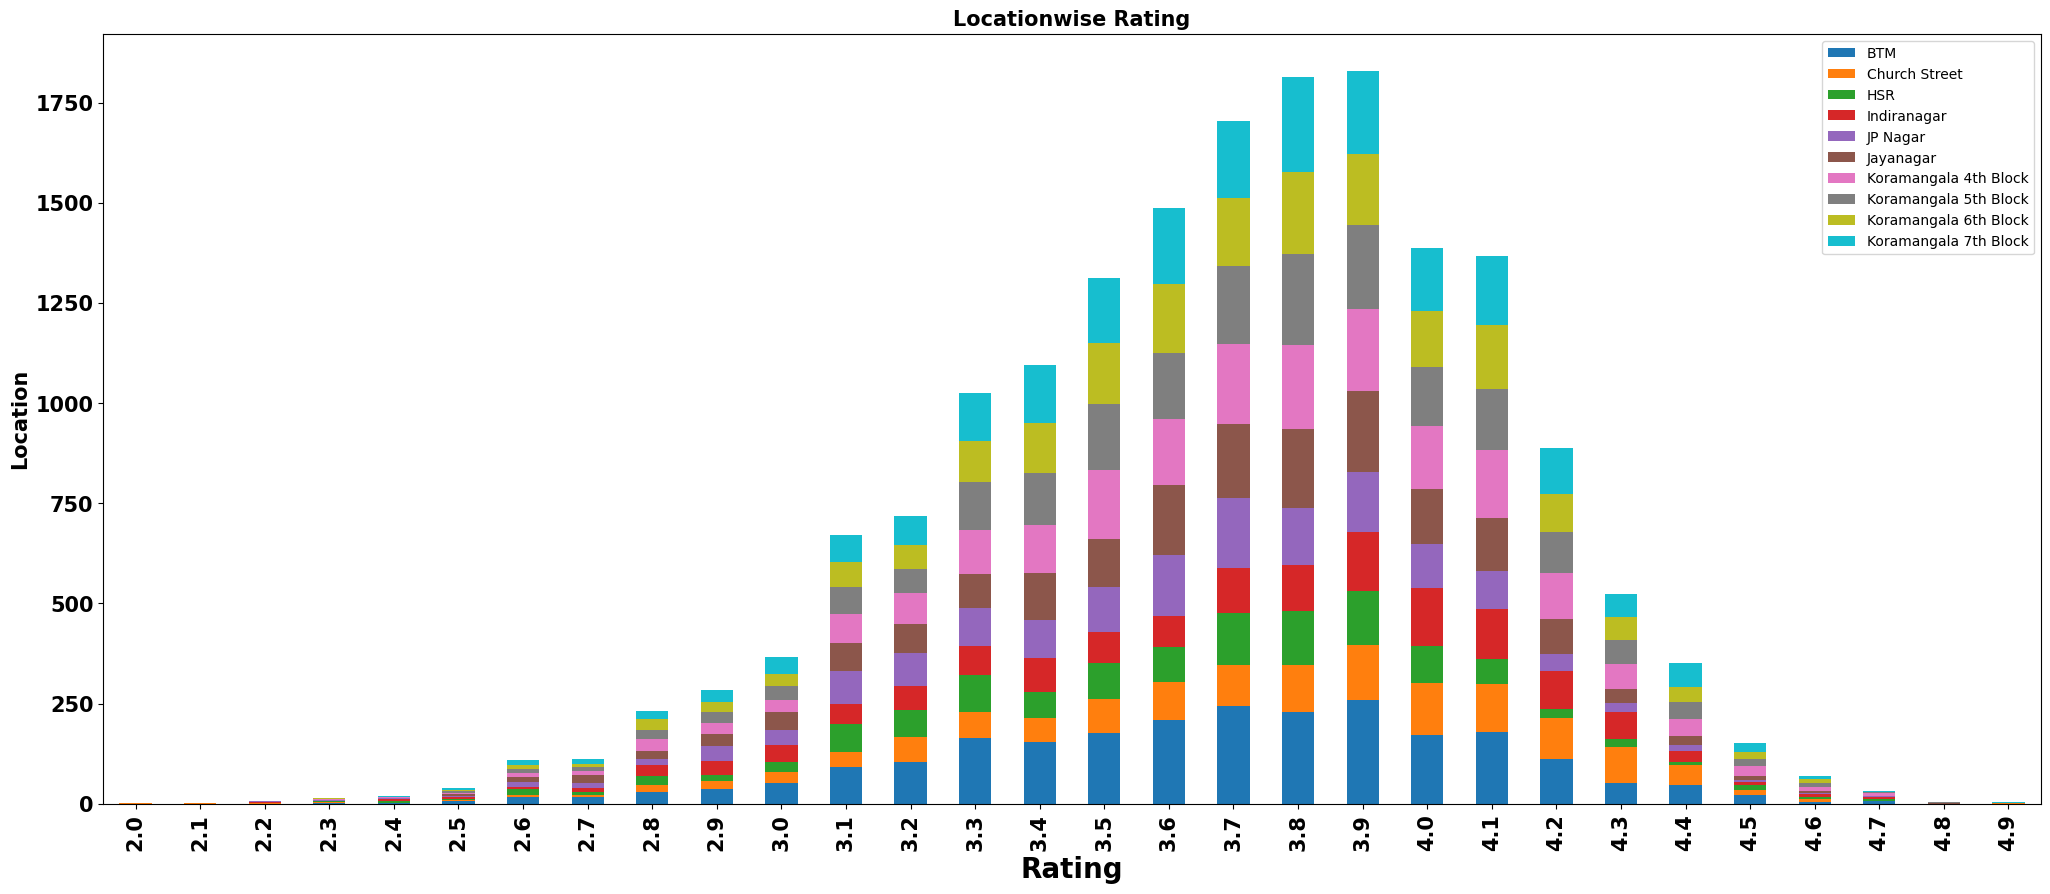

In [55]:
loc_plt.plot(kind='bar',stacked=True,figsize=(25,10));
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=15,fontweight='bold')
plt.xlabel('Rating',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(loc="best");

#### Restaurant Type

In [56]:
zomato_new["rest_type"].nunique()

93

In [57]:
top_10=[i for i in zomato_new["rest_type"].value_counts().head(10).index]

In [58]:
top_10

['Quick Bites',
 'Casual Dining',
 'Cafe',
 'Delivery',
 'Dessert Parlor',
 'Takeaway, Delivery',
 'Casual Dining, Bar',
 'Bakery',
 'Beverage Shop',
 'Bar']

In [59]:
zoomzto_top10=zomato_new.loc[zomato_new["rest_type"].isin(top_10)]

In [60]:
zoomzto_top10["rest_type"].value_counts()

Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           867
Bar                     697
Name: rest_type, dtype: int64

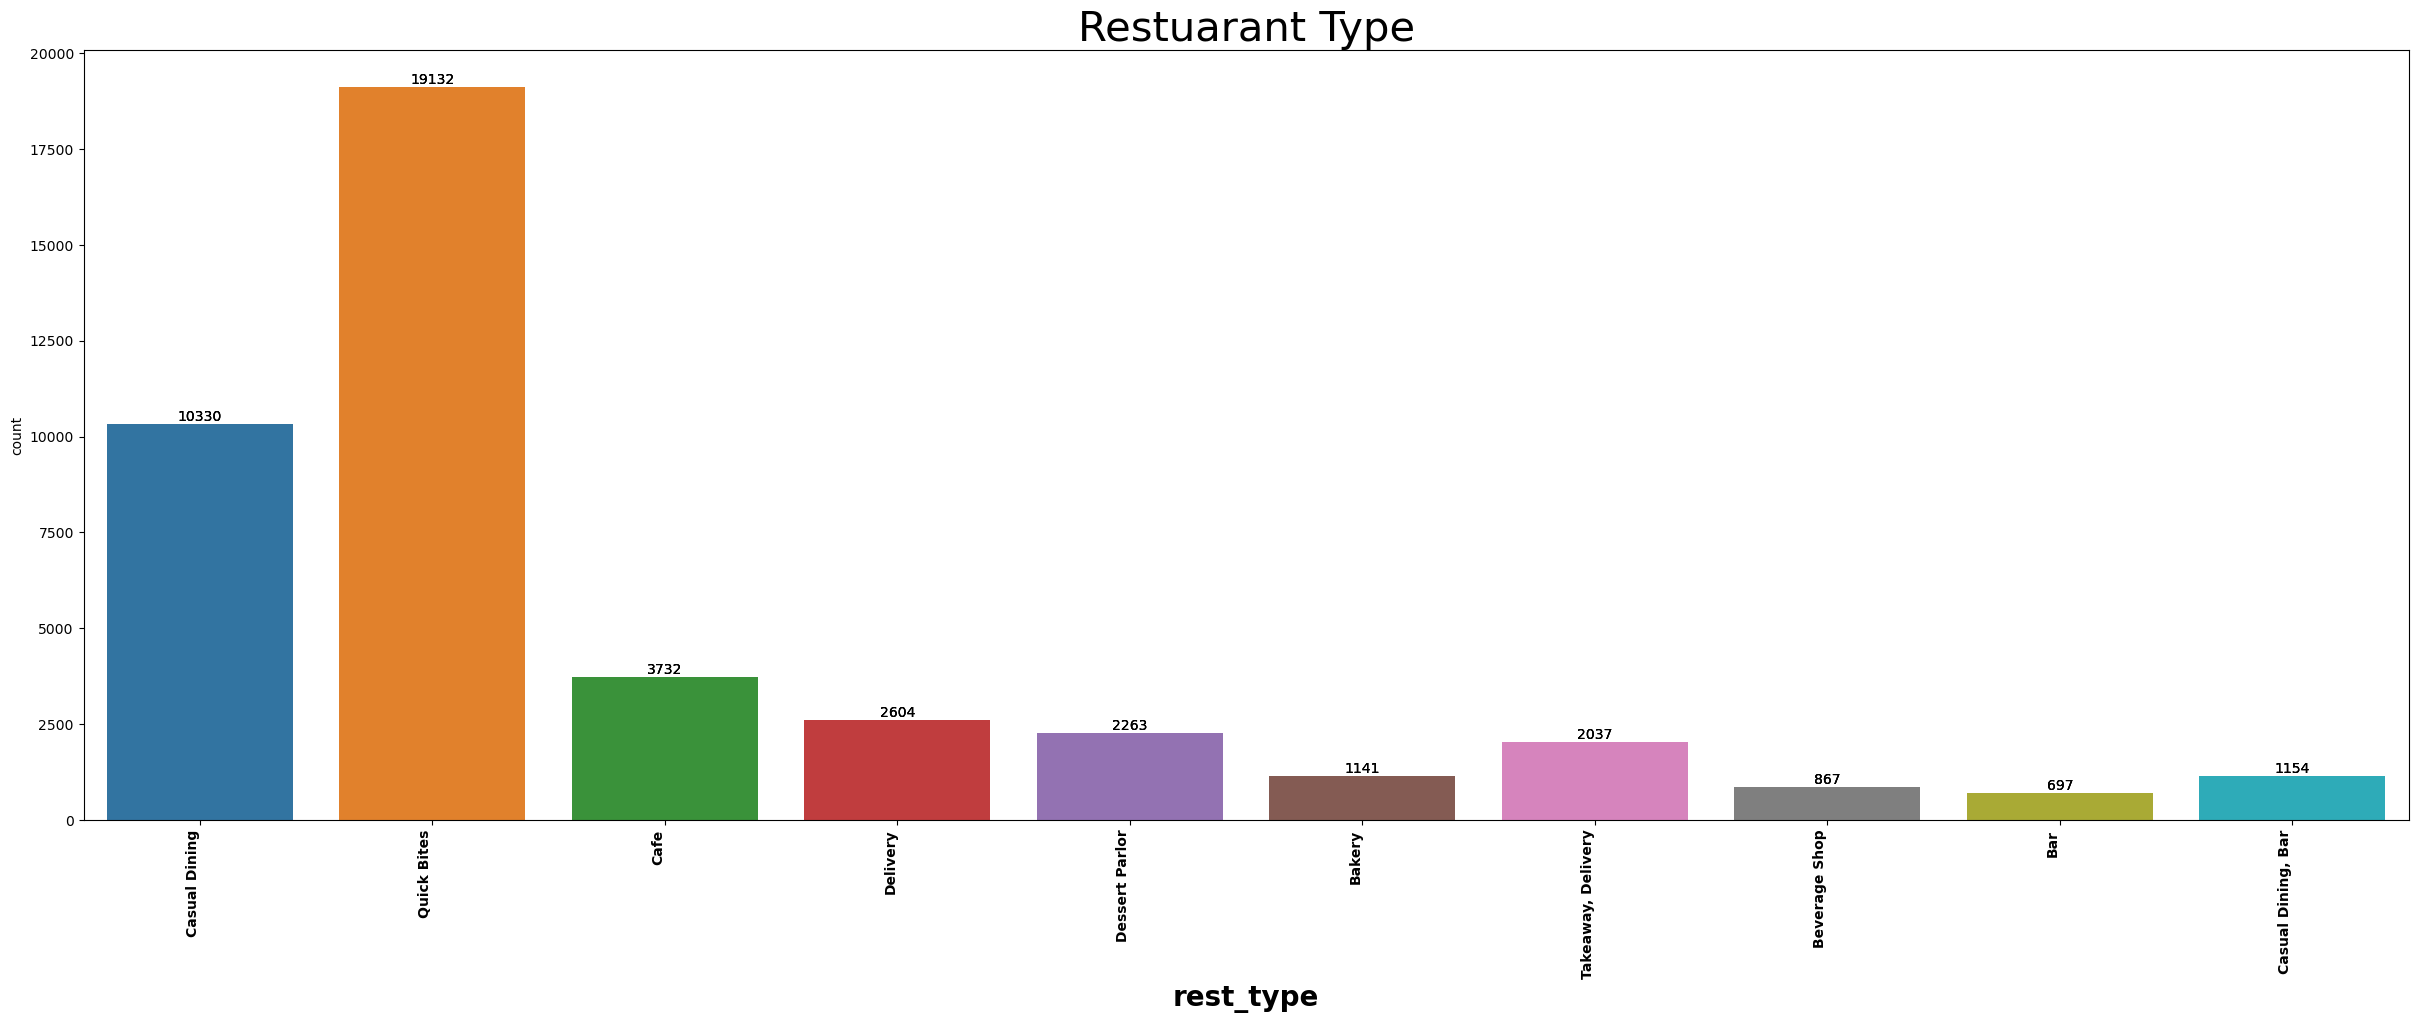

In [61]:
plt.figure(figsize=(30,10))
ax=sns.countplot(zoomzto_top10,x='rest_type')
sns.countplot(zoomzto_top10,x='rest_type').set_xticklabels(sns.countplot(zoomzto_top10,x='rest_type').get_xticklabels(), rotation=90, ha="right",fontweight='bold')
plt.xlabel('rest_type',fontsize=20,fontweight='bold')
plt.title('Restuarant Type',fontsize=30)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Type of rest vs Rating

In [62]:
loc_plt=pd.crosstab(zoomzto_top10['rate'],zomato_new['rest_type'])
loc_plt

rest_type,Bakery,Bar,Beverage Shop,Cafe,Casual Dining,"Casual Dining, Bar",Delivery,Dessert Parlor,Quick Bites,"Takeaway, Delivery"
rate,,,,,,,,,,
1.80,0,0,0,0,5,0,0,0,0,0
2.00,0,0,0,0,2,0,0,0,0,0
2.10,0,0,0,0,6,0,9,0,9,0
2.20,0,0,0,0,24,0,0,0,2,0
2.30,0,0,0,2,37,1,0,0,11,0
2.40,0,8,0,6,24,0,2,0,20,0
2.50,0,0,0,6,54,2,2,0,31,6
2.60,0,0,0,34,83,12,18,0,69,17
2.70,4,0,3,16,114,0,6,0,91,11


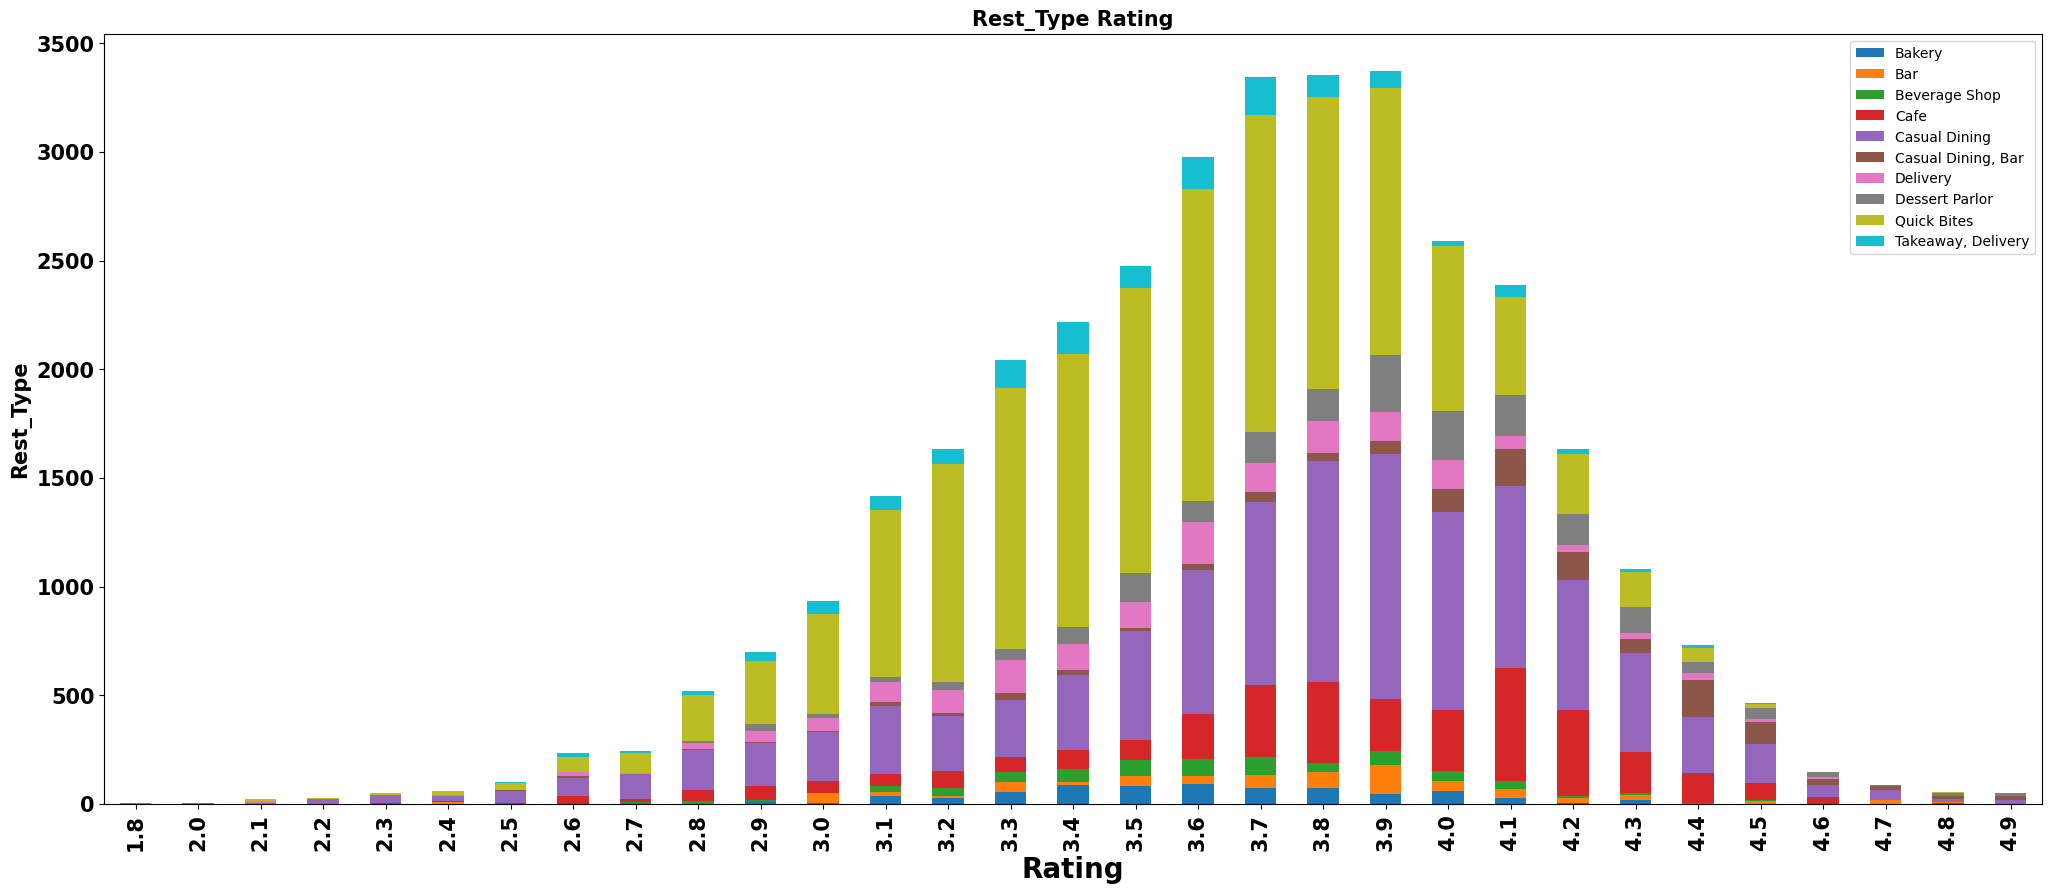

In [63]:
loc_plt.plot(kind='bar',stacked=True,figsize=(25,10));
plt.title('Rest_Type Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest_Type',fontsize=15,fontweight='bold')
plt.xlabel('Rating',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(loc="best");

#### Types of Services

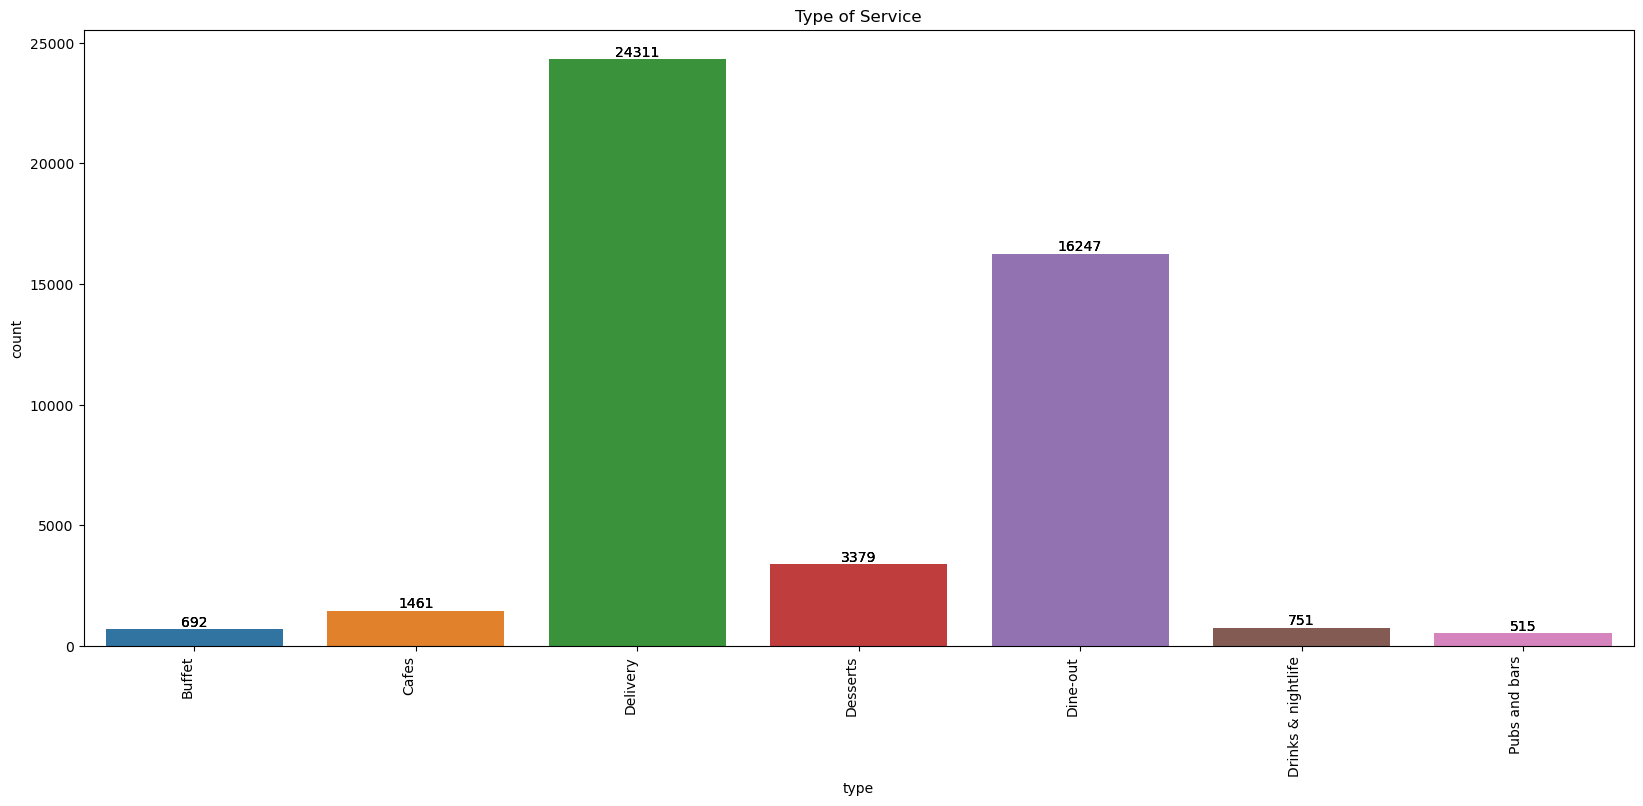

In [64]:
plt.figure(figsize=(20,8))
ax=sns.countplot(zomato_new,x='type')
sns.countplot(zomato_new,x='type').set_xticklabels(sns.countplot(zomato_new,x='type').get_xticklabels(), rotation=90, ha="right")
plt.title('Type of Service')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Type and Rating

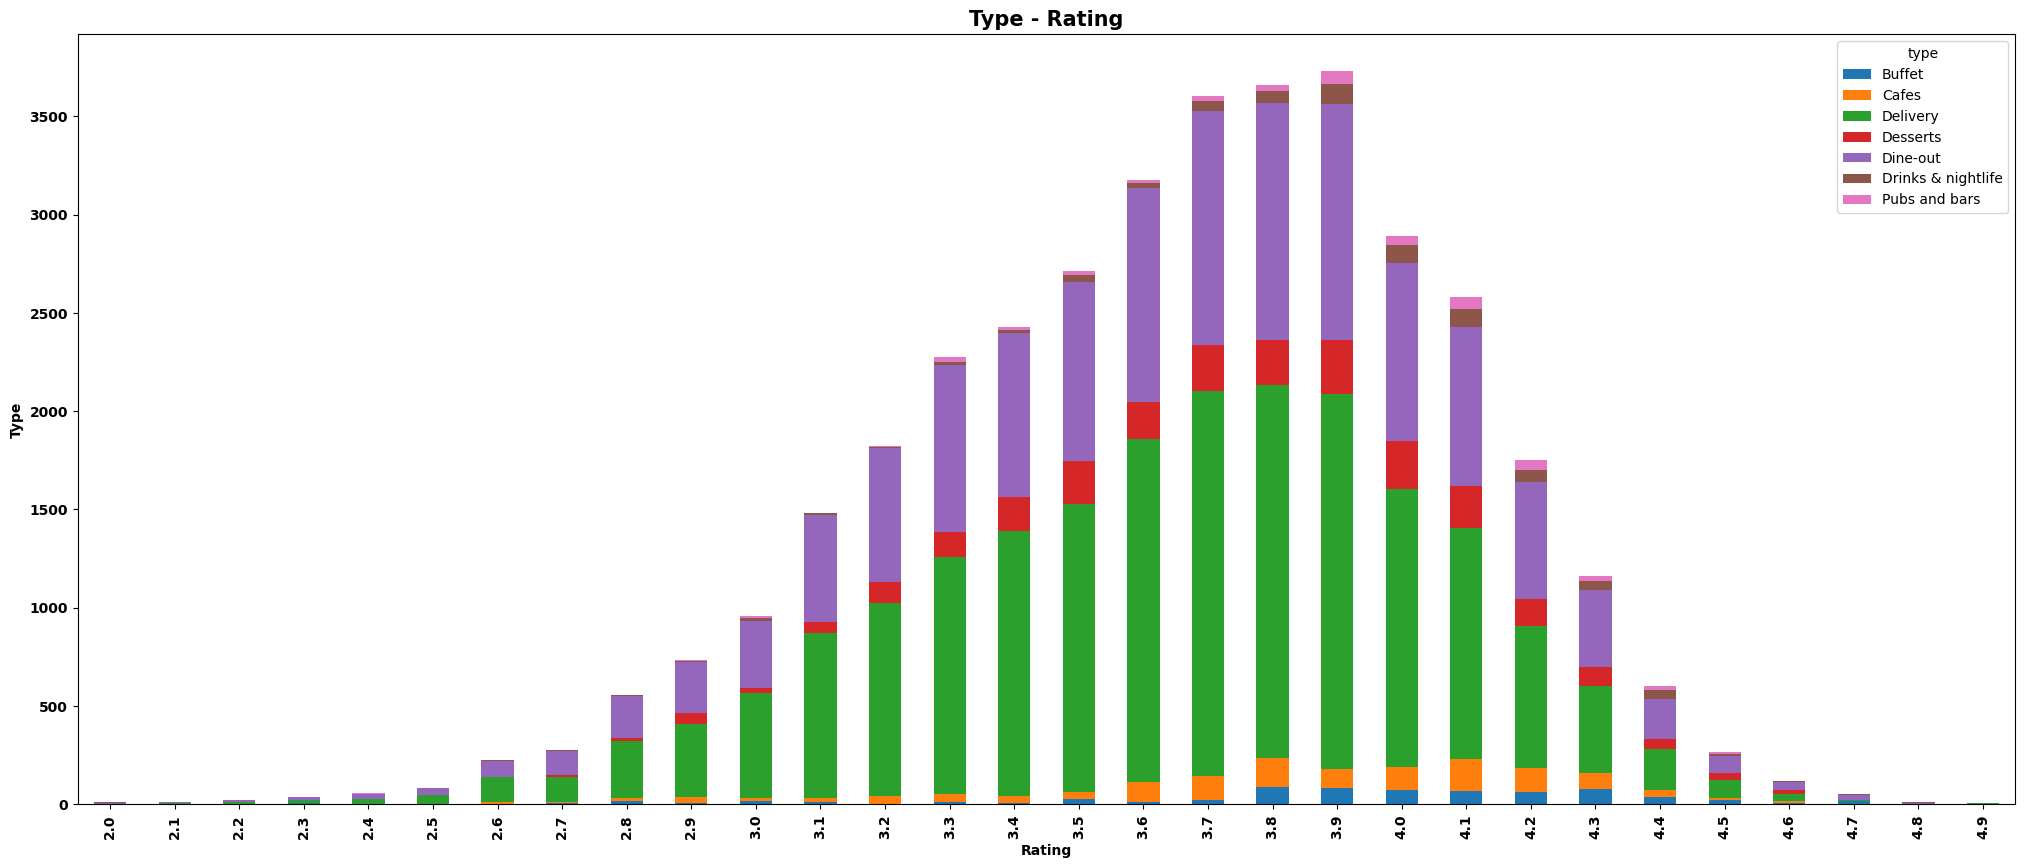

In [65]:
type_plt=pd.crosstab(zomato_new['rate'],zomato_new['type'])
type_plt.plot(kind='bar',stacked=True,figsize=(25,10))
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

#### Cost of Restuarant

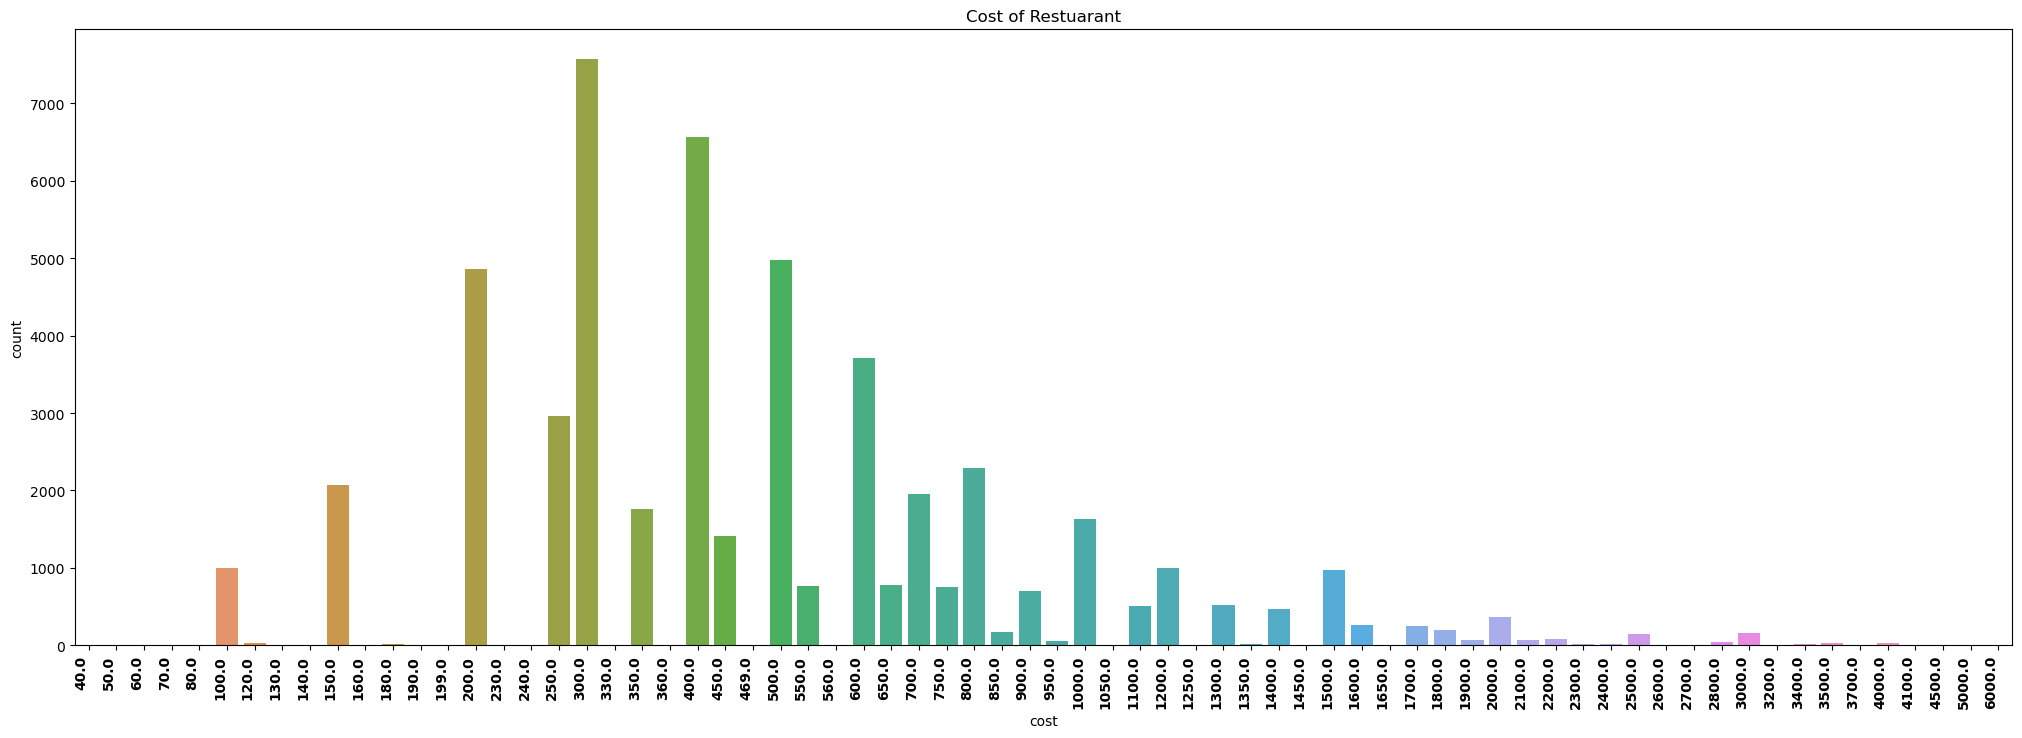

In [71]:
plt.figure(figsize=(25,8))
sns.countplot(zomato_new,x='cost')
sns.countplot(zomato_new,x='cost').set_xticklabels(sns.countplot(zomato_new,x='cost').get_xticklabels(), rotation=90, ha="right",fontweight='bold')
plt.title('Cost of Restuarant')
plt.show()

In [72]:
top_10_cost=[i for i in zomato_new["cost"].value_counts().head(10).index]

In [73]:
top_10_cost

[300.0, 400.0, 500.0, 200.0, 600.0, 250.0, 800.0, 150.0, 700.0, 350.0]

In [74]:
zom_10_cost=zomato_new.loc[zomato_new["cost"].isin(top_10_cost)]

In [75]:
zom_10_cost["cost"].value_counts()

300.00    7576
400.00    6562
500.00    4980
200.00    4857
600.00    3714
250.00    2959
800.00    2285
150.00    2066
700.00    1948
350.00    1763
Name: cost, dtype: int64

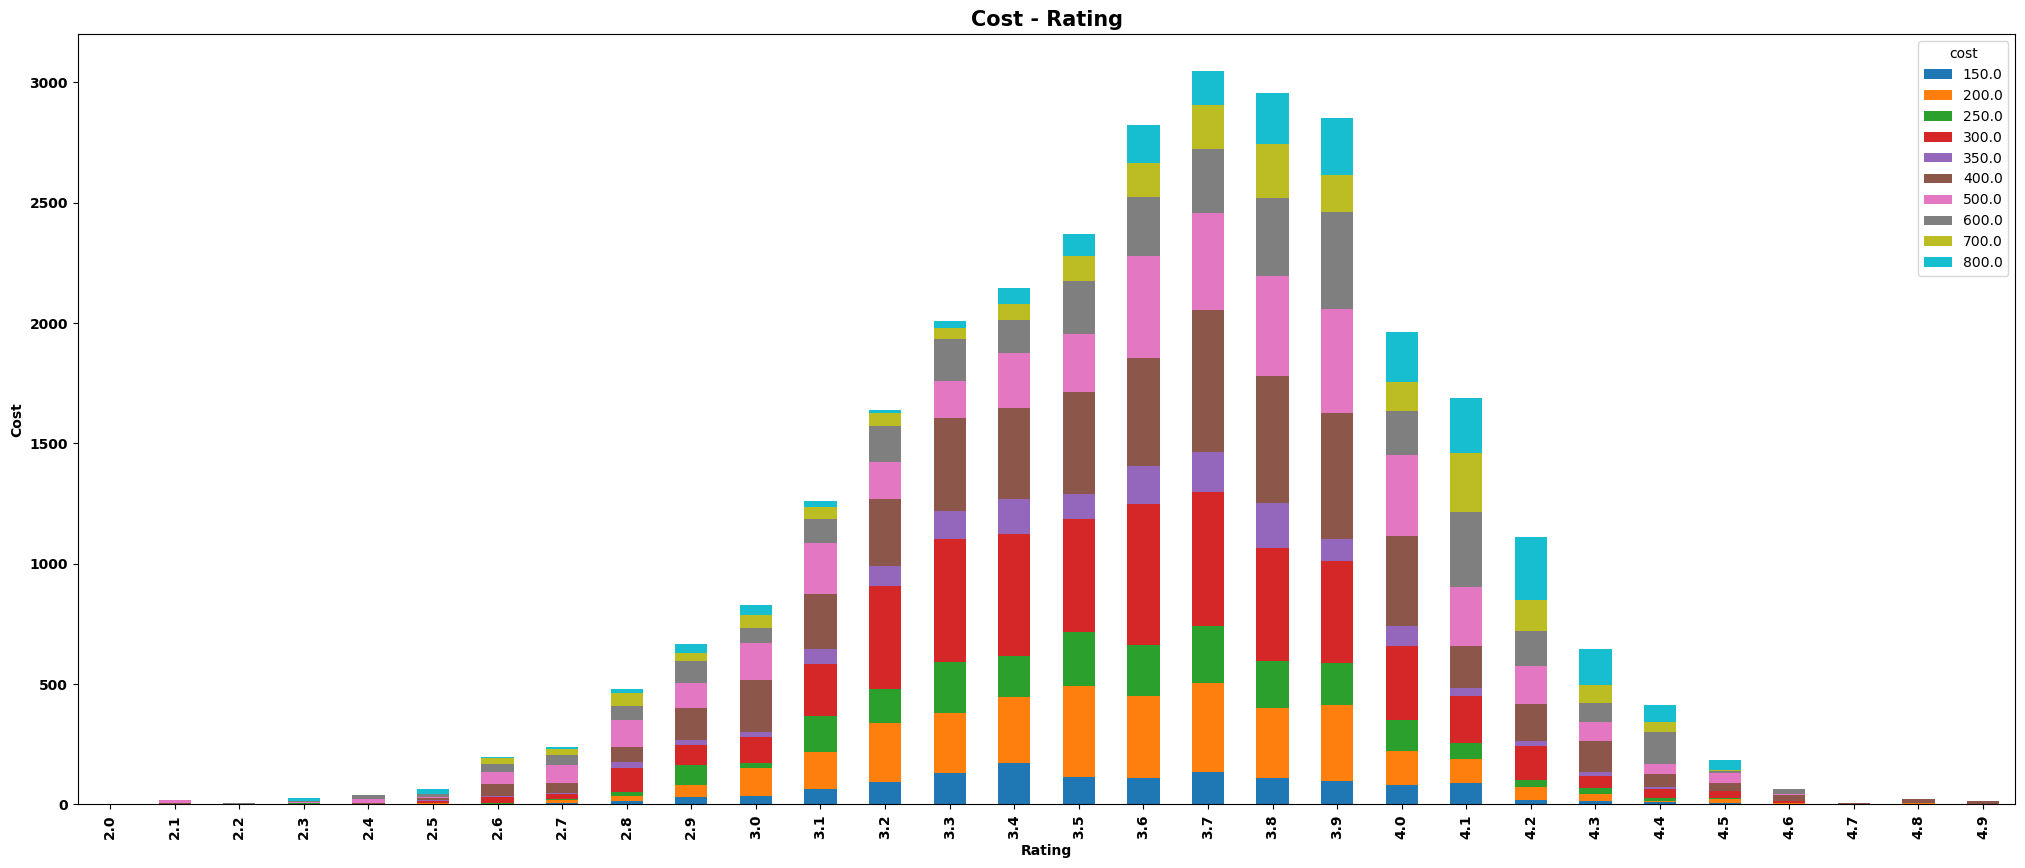

In [76]:
type_plt=pd.crosstab(zom_10_cost['rate'],zom_10_cost['cost'])
type_plt.plot(kind='bar',stacked=True,figsize=(25,10))
plt.title('Cost - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Cost',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

#### Most famous Restaurant chains in Bengaluru

In [77]:
zomato_new['name'].value_counts().head(10)

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Name: name, dtype: int64

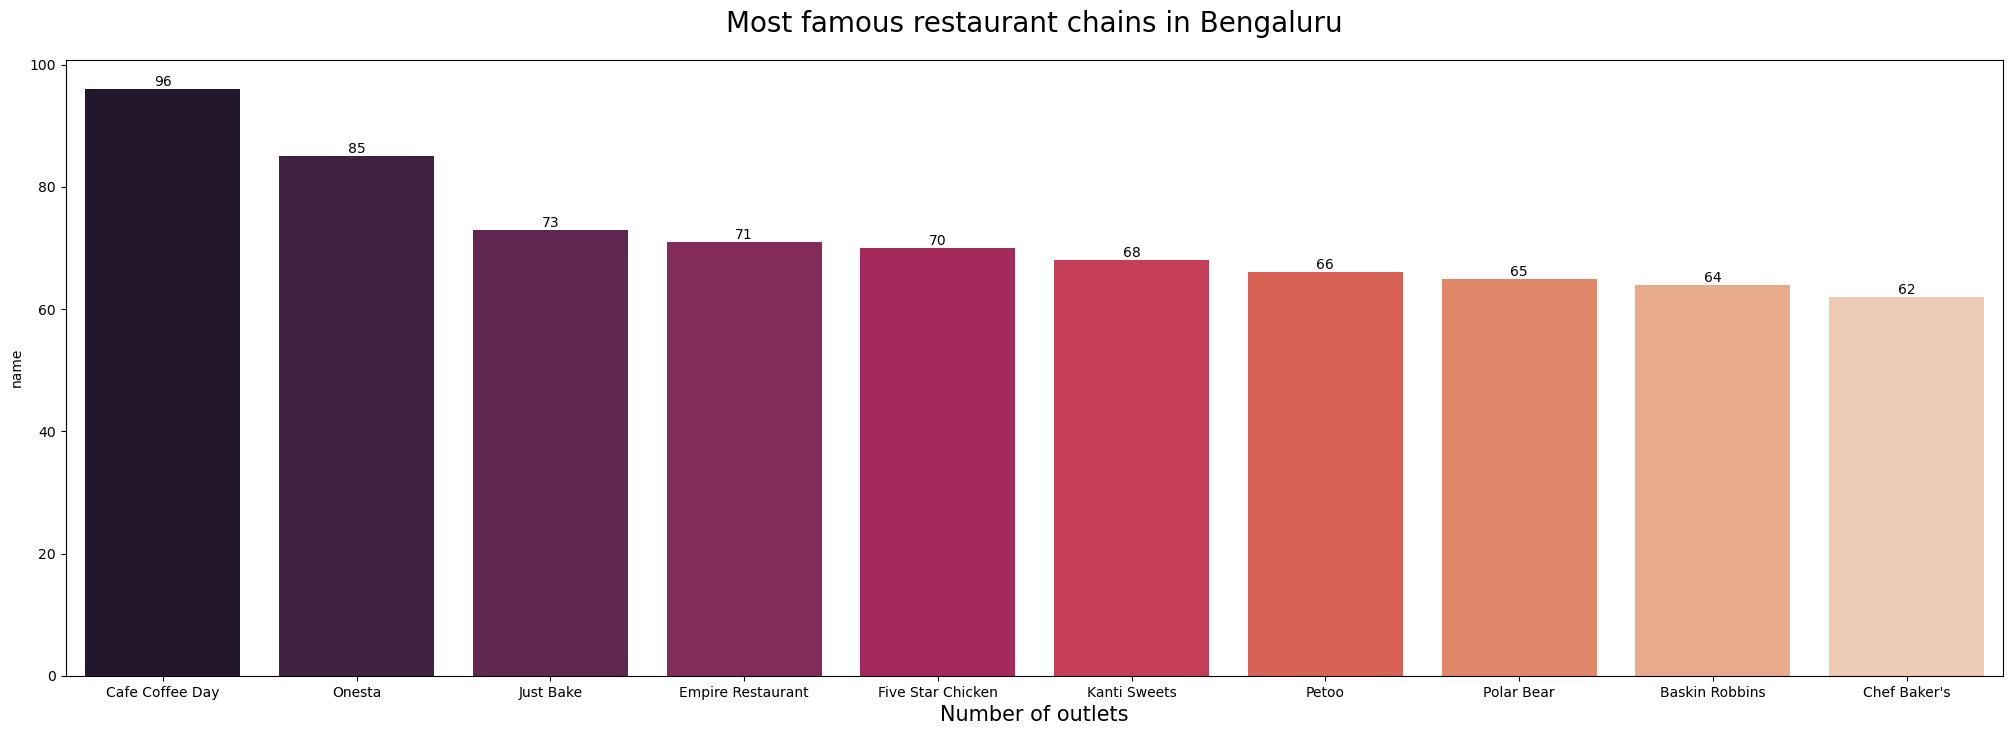

In [78]:
b=plt.figure(figsize=(25,8))
chains=zomato_new['name'].value_counts()[:10]
ax=sns.barplot(y=chains,x=chains.index,palette='rocket')
plt.title("Most famous restaurant chains in Bengaluru",size=20,pad=20)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Number of outlets",size=15)
plt.show()

In [79]:
zomato_new.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
rest_type         227
cuisines           45
cost              346
type             4361
city             4361
dtype: int64

## Cuisine Analysis

In [177]:
zomato_new.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.10,775,Casual Dining,"North Indian, Mughlai, Chinese",800.00,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.10,787,Casual Dining,"Chinese, North Indian, Thai",800.00,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.80,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.00,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.70,88,Quick Bites,"South Indian, North Indian",300.00,Buffet,Banashankari
4,Grand Village,No,No,3.80,166,Casual Dining,"North Indian, Rajasthani",600.00,Buffet,Banashankari


In [82]:
zomato_new["cuisines_list"]=zomato["cuisines"].apply(lambda x:x.split(",") if type(x)!=float else x)

In [88]:
for i in zomato_new["cuisines_list"]:
    for j in i:
        print(j)
        break
        

North Indian
Chinese
Cafe
South Indian
North Indian
North Indian
North Indian
Pizza
Cafe
 we had nachos cheese salsa which was okay. We ordered some garlic bread with cheese. A complete disappointment as it just had some processed cheese and the bread was dipped in ghee.\nWe ordered some chicken Alfredo hoping it would be better but to our disappointment
Cafe
Cafe
Cafe
Cafe
Cafe
Cafe
Cafe
Cafe
Chinese
Cafe
Cafe
Cafe
Cafe
Cafe
Italian
Cafe
Cafe
Cafe
Cafe
Cafe
North Indian
Cafe
North Indian
 ('Rated 3.0'
Bakery
Pizza
North Indian
 'RATED\n  Faasos is a perfect place to order some lip smacking fast food.\nI ordered Paneer steak 
Biryani
North Indian
Chinese
North Indian
 ""RATED\n  Okay this review is mainly about the shaadi ka biryani (mutton). Lived the taste. We had taken a home delivery of this through zomatogold. No complaints on the service and delivery.\n\nOther than that
South Indian
Street Food
South Indian
Burger
Pizza
Pizza
 herbed wedges\n\n#rajeshwrites')
North Indian
North I

TypeError: 'float' object is not iterable

In [92]:
count=0
for i in zomato_new["cuisines_list"]:
    if type(i)==list:
        for j in i:
            a=j.title().strip()
            if a=="North Indian":
                count+=1
                break
            else:
                continue
            

In [93]:
count

19286

In [179]:
zomato_new["cuisines"][0].split(",")

['North Indian', ' Mughlai', ' Chinese']

In [94]:
zomato_new["cuisines"]=zomato_new["cuisines"].apply(lambda x: x.split(",") if type(x)!=float else np.nan)

In [95]:
zomato_new["cuisines"]

0                [North Indian,  Mughlai,  Chinese]
1                   [Chinese,  North Indian,  Thai]
2                        [Cafe,  Mexican,  Italian]
3                     [South Indian,  North Indian]
4                       [North Indian,  Rajasthani]
                            ...                    
51712                                 [Continental]
51713                                 [Finger Food]
51714                                 [Finger Food]
51715                                 [Finger Food]
51716    [Finger Food,  North Indian,  Continental]
Name: cuisines, Length: 51717, dtype: object

In [96]:
zomato_cus=zomato_new.copy()

In [97]:
df_cus=zomato_cus.explode("cuisines")

In [98]:
df_cus

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city,cuisines_list
0,Jalsa,Yes,Yes,4.10,775,Casual Dining,North Indian,800.00,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]"
0,Jalsa,Yes,Yes,4.10,775,Casual Dining,Mughlai,800.00,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]"
0,Jalsa,Yes,Yes,4.10,775,Casual Dining,Chinese,800.00,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]"
1,Spice Elephant,Yes,No,4.10,787,Casual Dining,Chinese,800.00,Buffet,Banashankari,"[Chinese, North Indian, Thai]"
1,Spice Elephant,Yes,No,4.10,787,Casual Dining,North Indian,800.00,Buffet,Banashankari,"[Chinese, North Indian, Thai]"
...,...,...,...,...,...,...,...,...,...,...,...
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,Finger Food,2000.00,Pubs and bars,Whitefield,"[Biryani, Kebab]"
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.30,236,Bar,Finger Food,2500.00,Pubs and bars,Whitefield,"[South Indian, Biryani]"
51716,The Nest - The Den Bengaluru,No,No,3.40,13,"Bar, Casual Dining",Finger Food,1500.00,Pubs and bars,Whitefield,[ ('Rated 5.0']
51716,The Nest - The Den Bengaluru,No,No,3.40,13,"Bar, Casual Dining",North Indian,1500.00,Pubs and bars,Whitefield,[ ('Rated 5.0']


In [184]:
df_cus["cuisines"].value_counts()

 Chinese         12481
North Indian     12299
 North Indian     8786
 Fast Food        5504
South Indian      5010
                 ...  
 German              3
 Indian              2
 Malwani             2
Belgian              1
Singaporean          1
Name: cuisines, Length: 190, dtype: int64

In [99]:
df_cus["cuisines"]=df_cus["cuisines"].apply(lambda x:x.lower().strip() if type(x)==str else x)

In [100]:
df_cus["cuisines"].value_counts()

north indian    21085
chinese         15547
south indian     8644
fast food        8096
biryani          6492
                ...  
sindhi              4
pan asian           3
hot dogs            3
indian              2
malwani             2
Name: cuisines, Length: 107, dtype: int64

In [106]:
df_cus["city"].value_counts().head(10).index

Index(['BTM', 'Koramangala 7th Block', 'Koramangala 4th Block',
       'Koramangala 5th Block', 'Koramangala 6th Block', 'Jayanagar',
       'JP Nagar', 'Indiranagar', 'Church Street', 'HSR'],
      dtype='object')

In [108]:
top10=[i for i in df_cus["city"].value_counts().head(10).index]

In [110]:
top=df_cus.loc[df_cus["city"].isin(top10)]

In [114]:
top.shape

(53509, 11)

In [117]:
top["cuisines"].value_counts().head(10)

north indian    8903
chinese         6759
fast food       3710
south indian    3522
biryani         2790
desserts        2451
beverages       2252
cafe            2174
continental     2127
italian         1220
Name: cuisines, dtype: int64

In [122]:
w=[i for i in top["cuisines"].value_counts().head(10).index ]

In [123]:
w

['north indian',
 'chinese',
 'fast food',
 'south indian',
 'biryani',
 'desserts',
 'beverages',
 'cafe',
 'continental',
 'italian']

In [124]:
top_cus=top.loc[top["cuisines"].isin([i for i in top["cuisines"].value_counts().head(10).index ])]

In [128]:
pd.crosstab(top_cus["city"],top_cus["cuisines"],margins=True)

cuisines,beverages,biryani,cafe,chinese,continental,desserts,fast food,italian,north indian,south indian,All
city,,,,,,,,,,,
BTM,331,406,283,972,241,300,530,132,1294,474,4963
Church Street,99,148,215,462,246,204,250,125,601,291,2641
HSR,154,251,112,481,152,180,290,78,698,263,2659
Indiranagar,160,202,220,435,243,217,254,123,618,243,2715
JP Nagar,201,247,168,593,117,220,331,92,794,361,3124
Jayanagar,262,265,228,688,153,235,408,121,882,410,3652
Koramangala 4th Block,269,330,261,777,261,280,414,148,1003,367,4110
Koramangala 5th Block,257,333,199,809,241,269,415,130,1036,379,4068
Koramangala 6th Block,241,283,232,714,223,258,386,129,909,337,3712


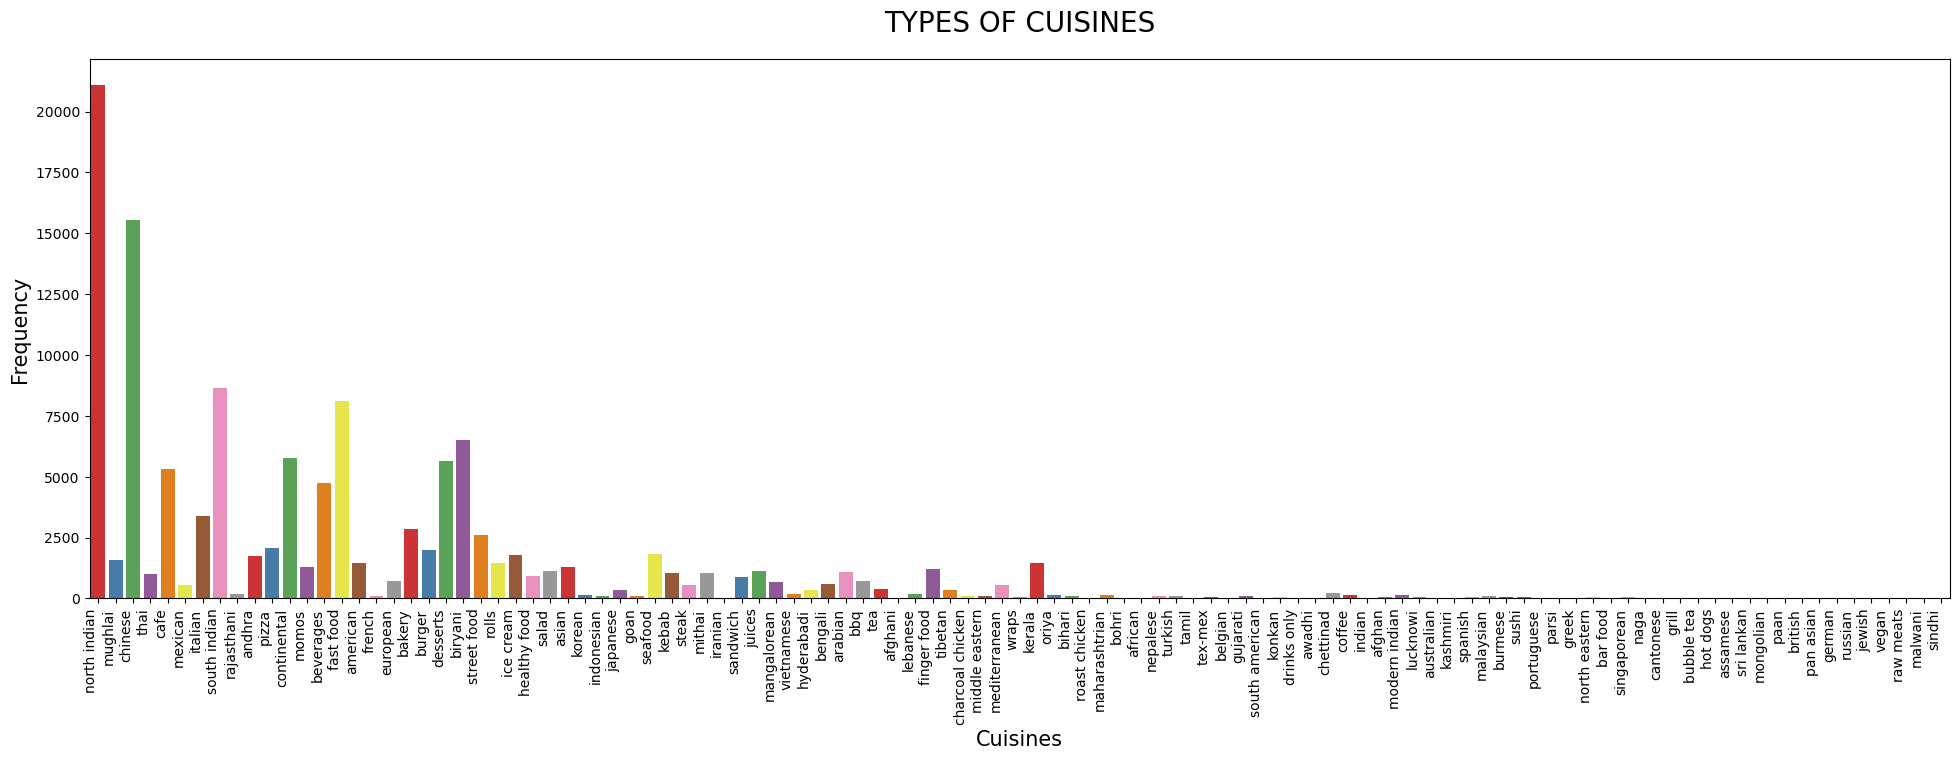

In [187]:
fig = plt.figure(figsize=(24,7))
rest = sns.countplot(x="cuisines",data=df_cus, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Cuisines",size=15)

plt.title('TYPES OF CUISINES',fontsize = 20 ,pad=20)
plt.show()

# Feature Engineering 

In [188]:
zomato_new.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.10,775,Casual Dining,"[North Indian, Mughlai, Chinese]",800.00,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.10,787,Casual Dining,"[Chinese, North Indian, Thai]",800.00,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.80,918,"Cafe, Casual Dining","[Cafe, Mexican, Italian]",800.00,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.70,88,Quick Bites,"[South Indian, North Indian]",300.00,Buffet,Banashankari
4,Grand Village,No,No,3.80,166,Casual Dining,"[North Indian, Rajasthani]",600.00,Buffet,Banashankari


### dropping irrelevant columns like cuisines,name

In [189]:
zomato_new.drop(["cuisines","name"],axis=1,inplace=True)

In [190]:
zomato_new.isnull().mean()*100

online_order    0.00
book_table      0.00
rate           19.44
votes           0.00
rest_type       0.44
cost            0.67
type            8.43
city            8.43
dtype: float64

In [191]:
zomato_new1=zomato_new.copy()

In [192]:
zomato_new1.head()

,online_order,book_table,rate,votes,rest_type,cost,type,city
0,Yes,Yes,4.10,775,Casual Dining,800.00,Buffet,Banashankari
1,Yes,No,4.10,787,Casual Dining,800.00,Buffet,Banashankari
2,Yes,No,3.80,918,"Cafe, Casual Dining",800.00,Buffet,Banashankari
3,No,No,3.70,88,Quick Bites,300.00,Buffet,Banashankari
4,No,No,3.80,166,Casual Dining,600.00,Buffet,Banashankari


In [193]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [194]:
from sklearn.compose import ColumnTransformer

In [195]:
pipeline = ColumnTransformer(transformers=[
    ('hmv',SimpleImputer(strategy="most_frequent"),['rest_type',"city"]),
    ("knn",KNNImputer(),["cost","rate"]),
    #('oe',OrdinalEncoder(categories=[['poor','good',"verygood"]]),['rate']),
    ('ohe',OneHotEncoder(sparse=False,drop='first'),["online_order","book_table"])
],remainder='drop')


In [196]:
pipeline

ColumnTransformer(transformers=[('hmv', SimpleImputer(strategy='most_frequent'),
                                 ['rest_type', 'city']),
                                ('knn', KNNImputer(), ['cost', 'rate']),
                                ('ohe',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['online_order', 'book_table'])])

In [197]:
zomato_new2=pipeline.fit_transform(zomato_new1)

In [198]:
zomato_new2

array([['Casual Dining', 'Banashankari', 800.0, 4.1, 1.0, 1.0],
       ['Casual Dining', 'Banashankari', 800.0, 4.1, 1.0, 0.0],
       ['Cafe, Casual Dining', 'Banashankari', 800.0, 3.8, 1.0, 0.0],
       ...,
       ['Bar', 'Whitefield', 2000.0, 4.1, 0.0, 0.0],
       ['Bar', 'Whitefield', 2500.0, 4.3, 0.0, 1.0],
       ['Bar, Casual Dining', 'Whitefield', 1500.0, 3.4, 0.0, 0.0]],
      dtype=object)

In [199]:
zomato_new3=pd.DataFrame(zomato_new2,columns=['rest_type', 'city',"cost","rate",'online_order','book_table'])

In [200]:
zomato_new3.head()

,rest_type,city,cost,rate,online_order,book_table
0,Casual Dining,Banashankari,800.00,4.10,1.00,1.00
1,Casual Dining,Banashankari,800.00,4.10,1.00,0.00
2,"Cafe, Casual Dining",Banashankari,800.00,3.80,1.00,0.00
3,Quick Bites,Banashankari,300.00,3.70,0.00,0.00
4,Casual Dining,Banashankari,600.00,3.80,0.00,0.00


In [201]:
zomato_new3.isnull().sum()

rest_type       0
city            0
cost            0
rate            0
online_order    0
book_table      0
dtype: int64

In [202]:
zomato_new3=pd.concat([zomato_new3,zomato_new1["votes"]],axis=1)

In [203]:
zomato_new3.head()

,rest_type,city,cost,rate,online_order,book_table,votes
0,Casual Dining,Banashankari,800.00,4.10,1.00,1.00,775
1,Casual Dining,Banashankari,800.00,4.10,1.00,0.00,787
2,"Cafe, Casual Dining",Banashankari,800.00,3.80,1.00,0.00,918
3,Quick Bites,Banashankari,300.00,3.70,0.00,0.00,88
4,Casual Dining,Banashankari,600.00,3.80,0.00,0.00,166


# Frequency Encoding for rest_type and city

In [204]:
zomato_new3["city"].value_counts()

BTM                      7423
Koramangala 7th Block    2664
Koramangala 5th Block    2544
Koramangala 4th Block    2530
Koramangala 6th Block    2323
Jayanagar                2225
JP Nagar                 1946
Indiranagar              1713
Church Street            1655
HSR                      1599
Brigade Road             1577
Bannerghatta Road        1547
Lavelle Road             1528
MG Road                  1525
Marathahalli             1509
Whitefield               1497
Brookefield              1437
Residency Road           1392
Old Airport Road         1256
Kalyan Nagar             1237
Basavanagudi             1222
Kammanahalli             1220
Electronic City          1190
Sarjapur Road            1151
Bellandur                1141
Frazer Town              1113
Malleshwaram             1025
Rajajinagar               996
Banashankari              836
New BEL Road              696
Name: city, dtype: int64

In [205]:
top5_city=[i for i in zomato_new3["city"].value_counts().head(5).index]

In [206]:
top5_city

['BTM',
 'Koramangala 7th Block',
 'Koramangala 5th Block',
 'Koramangala 4th Block',
 'Koramangala 6th Block']

In [207]:
for i in top5_city:
    zomato_new3[i]=np.where(zomato_new3["city"]==i,1,0)

In [208]:
zomato_new3.head()

,rest_type,city,cost,rate,online_order,book_table,votes,BTM,Koramangala 7th Block,Koramangala 5th Block,Koramangala 4th Block,Koramangala 6th Block
0,Casual Dining,Banashankari,800.00,4.10,1.00,1.00,775,0,0,0,0,0
1,Casual Dining,Banashankari,800.00,4.10,1.00,0.00,787,0,0,0,0,0
2,"Cafe, Casual Dining",Banashankari,800.00,3.80,1.00,0.00,918,0,0,0,0,0
3,Quick Bites,Banashankari,300.00,3.70,0.00,0.00,88,0,0,0,0,0
4,Casual Dining,Banashankari,600.00,3.80,0.00,0.00,166,0,0,0,0,0


In [209]:
pd.set_option("display.max_rows",None)

In [210]:
top5_restype=[i for i in zomato_new3["rest_type"].value_counts().head(5).index]

In [211]:
top5_restype

['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor']

In [212]:
for i in top5_restype:
    zomato_new3[i]=np.where(zomato_new3["rest_type"]==i,1,0)

In [213]:
zomato_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   rest_type              51717 non-null  object
 1   city                   51717 non-null  object
 2   cost                   51717 non-null  object
 3   rate                   51717 non-null  object
 4   online_order           51717 non-null  object
 5   book_table             51717 non-null  object
 6   votes                  51717 non-null  int32 
 7   BTM                    51717 non-null  int32 
 8   Koramangala 7th Block  51717 non-null  int32 
 9   Koramangala 5th Block  51717 non-null  int32 
 10  Koramangala 4th Block  51717 non-null  int32 
 11  Koramangala 6th Block  51717 non-null  int32 
 12  Quick Bites            51717 non-null  int32 
 13  Casual Dining          51717 non-null  int32 
 14  Cafe                   51717 non-null  int32 
 15  Delivery           

In [214]:
zomato_new3.head()

,rest_type,city,cost,rate,online_order,book_table,votes,BTM,Koramangala 7th Block,Koramangala 5th Block,Koramangala 4th Block,Koramangala 6th Block,Quick Bites,Casual Dining,Cafe,Delivery,Dessert Parlor
0,Casual Dining,Banashankari,800.00,4.10,1.00,1.00,775,0,0,0,0,0,0,1,0,0,0
1,Casual Dining,Banashankari,800.00,4.10,1.00,0.00,787,0,0,0,0,0,0,1,0,0,0
2,"Cafe, Casual Dining",Banashankari,800.00,3.80,1.00,0.00,918,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,Banashankari,300.00,3.70,0.00,0.00,88,0,0,0,0,0,1,0,0,0,0
4,Casual Dining,Banashankari,600.00,3.80,0.00,0.00,166,0,0,0,0,0,0,1,0,0,0


In [215]:
zomato_new3.columns 

Index(['rest_type', 'city', 'cost', 'rate', 'online_order', 'book_table',
       'votes', 'BTM', 'Koramangala 7th Block', 'Koramangala 5th Block',
       'Koramangala 4th Block', 'Koramangala 6th Block', 'Quick Bites',
       'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor'],
      dtype='object')

In [216]:
zomato_new3.drop(["rest_type","city"],axis=1,inplace=True)

In [217]:
zomato_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cost                   51717 non-null  object
 1   rate                   51717 non-null  object
 2   online_order           51717 non-null  object
 3   book_table             51717 non-null  object
 4   votes                  51717 non-null  int32 
 5   BTM                    51717 non-null  int32 
 6   Koramangala 7th Block  51717 non-null  int32 
 7   Koramangala 5th Block  51717 non-null  int32 
 8   Koramangala 4th Block  51717 non-null  int32 
 9   Koramangala 6th Block  51717 non-null  int32 
 10  Quick Bites            51717 non-null  int32 
 11  Casual Dining          51717 non-null  int32 
 12  Cafe                   51717 non-null  int32 
 13  Delivery               51717 non-null  int32 
 14  Dessert Parlor         51717 non-null  int32 
dtypes: int32(11), objec

In [218]:
zomato_new3["cost"]=zomato_new3["cost"].astype("float")
zomato_new3["rate"]=zomato_new3["rate"].astype("float")

zomato_new3["online_order"]=zomato_new3["online_order"].astype("int")
zomato_new3["book_table"]=zomato_new3["book_table"].astype("int")




In [219]:
zomato_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cost                   51717 non-null  float64
 1   rate                   51717 non-null  float64
 2   online_order           51717 non-null  int32  
 3   book_table             51717 non-null  int32  
 4   votes                  51717 non-null  int32  
 5   BTM                    51717 non-null  int32  
 6   Koramangala 7th Block  51717 non-null  int32  
 7   Koramangala 5th Block  51717 non-null  int32  
 8   Koramangala 4th Block  51717 non-null  int32  
 9   Koramangala 6th Block  51717 non-null  int32  
 10  Quick Bites            51717 non-null  int32  
 11  Casual Dining          51717 non-null  int32  
 12  Cafe                   51717 non-null  int32  
 13  Delivery               51717 non-null  int32  
 14  Dessert Parlor         51717 non-null  int32  
dtypes:

# checking outlier treatment

In [220]:
zomato_out=zomato_new3[["rate","cost","votes"]]

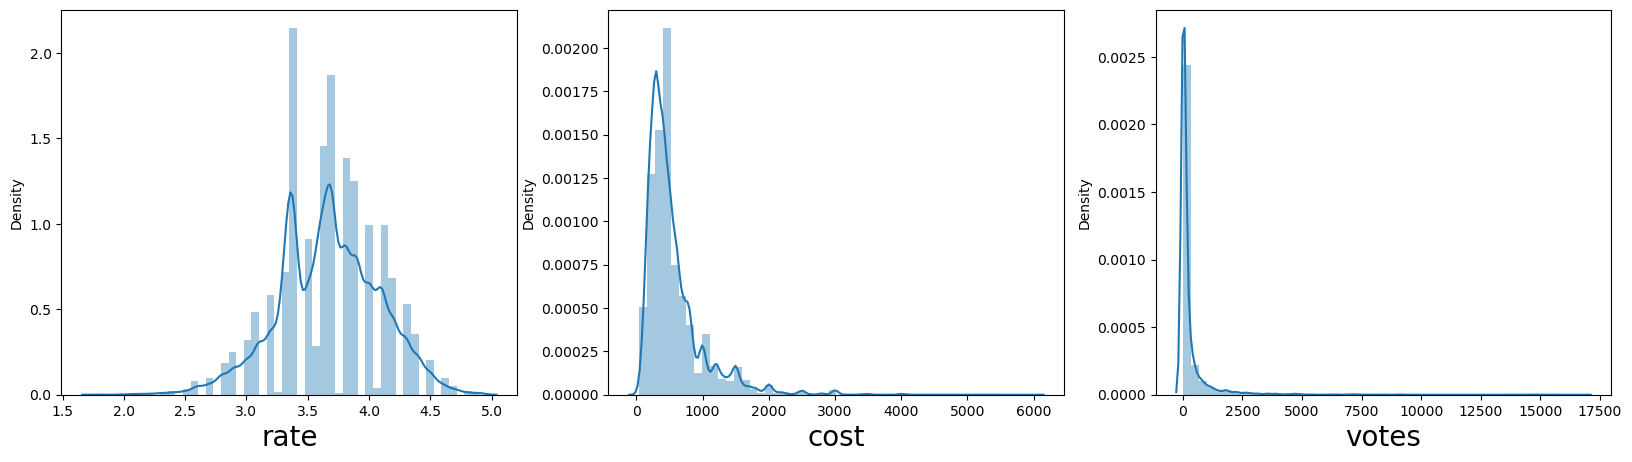

In [221]:
plt.figure(figsize=(20,5))
plotnumber=1
for i in zomato_out:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(zomato_out[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

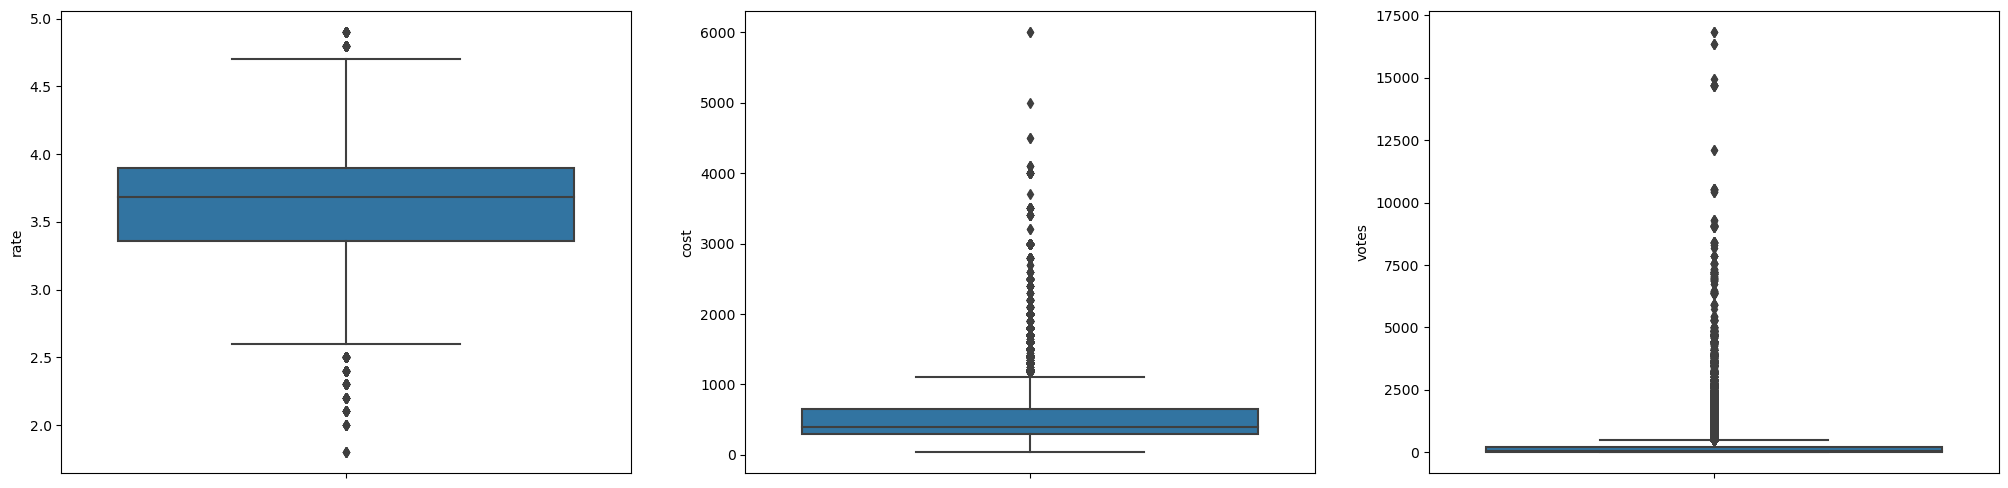

In [222]:
plt.figure(figsize=(25,6))
plotnumber=1
for i in zomato_out:
    ax=plt.subplot(1,3,plotnumber)
    sns.boxplot(y=zomato_out[i])
    plotnumber+=1
plt.show()

In [223]:
q1=zomato_out["cost"].quantile(.25)

In [224]:
q1

300.0

In [225]:
q3=zomato_out["cost"].quantile(.75)

In [226]:
q3

650.0

In [227]:
iqr=q3-q1

In [228]:
iqr

350.0

In [229]:
uo=q3+(1.5*iqr)

In [230]:
uo

1175.0

In [231]:
len(zomato_new3.loc[zomato_new3["cost"]>1175])

4804

In [232]:
zomato_final=zomato_new3.loc[zomato_new3["cost"]<=1175]

In [233]:
zomato_final.head()

,cost,rate,online_order,book_table,votes,BTM,Koramangala 7th Block,Koramangala 5th Block,Koramangala 4th Block,Koramangala 6th Block,Quick Bites,Casual Dining,Cafe,Delivery,Dessert Parlor
0,800.00,4.10,1,1,775,0,0,0,0,0,0,1,0,0,0
1,800.00,4.10,1,0,787,0,0,0,0,0,0,1,0,0,0
2,800.00,3.80,1,0,918,0,0,0,0,0,0,0,0,0,0
3,300.00,3.70,0,0,88,0,0,0,0,0,1,0,0,0,0
4,600.00,3.80,0,0,166,0,0,0,0,0,0,1,0,0,0


# MODEL BUILDING

In [234]:
zomato_new3.shape

(51717, 15)

In [235]:
x=zomato_new3.drop(["cost"],axis=1)

In [236]:
x.shape

(51717, 14)

In [237]:
y=zomato_new3["cost"]

In [238]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [239]:
 model = {
'linear_regression' : {'model': LinearRegression(),'params': {'positive': [True, False]}},
'random_forest': {'model': RandomForestRegressor(),'params': {'n_estimators': [50,100,200,300],'max_samples': [30000,35000]}},
'decision_tree': {'model': DecisionTreeRegressor(),'params': {'max_depth' :[3,5,10,15,20,25,30,35,40,45,50] ,'splitter': ['best','random']}}}

In [240]:
model

{'linear_regression': {'model': LinearRegression(),
  'params': {'positive': [True, False]}},
 'random_forest': {'model': RandomForestRegressor(),
  'params': {'n_estimators': [50, 100, 200, 300],
   'max_samples': [30000, 35000]}},
 'decision_tree': {'model': DecisionTreeRegressor(),
  'params': {'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
   'splitter': ['best', 'random']}}}

In [196]:
#  model = {
# 'linear_regression' : {'model': LinearRegression(),'params': {'positive': [True, False]}},
# 'random_forest': {'model': RandomForestRegressor(),'params': {'n_estimators': [50,100,200,300],'max_samples': [30000,35000]}},
# 'decision_tree': {'model': DecisionTreeRegressor(),'params': {'max_depth' :[3,5,10,15,20,25,30,35,40,45,50] ,'splitter': ['best','random']}},
# "ada_boosting" : {"model": AdaBoostRegressor(),'params': {'n_estimators': [50,100,200,300]}},
# "gradient_boosting":{"model":GradientBoostingRegressor(),'params': {'n_estimators': [50,100,200,300],"learning_rate":[.1,.2,.3,.4,.5],"max_features" : ['auto', 'sqrt', 'log2']}},
# "support_vector":{"model":SVR(),'params': {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}},               
# "knn_regressor":{"model":KNeighborsRegressor(),'params': {"n_neighbors":np.linspace(2,30,29)}}                
#     }

In [241]:
model.items()

dict_items([('linear_regression', {'model': LinearRegression(), 'params': {'positive': [True, False]}}), ('random_forest', {'model': RandomForestRegressor(), 'params': {'n_estimators': [50, 100, 200, 300], 'max_samples': [30000, 35000]}}), ('decision_tree', {'model': DecisionTreeRegressor(), 'params': {'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'splitter': ['best', 'random']}})])

In [242]:
for i,j in model.items():
    print(j["params"])

{'positive': [True, False]}
{'n_estimators': [50, 100, 200, 300], 'max_samples': [30000, 35000]}
{'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'splitter': ['best', 'random']}


In [243]:
def find_best_model_using_gridsearchcv(x,y):
   
    scores = []
    cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
    for model_name, config in model.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [254]:
x.columns

Index(['rate', 'online_order', 'book_table', 'votes', 'BTM',
       'Koramangala 7th Block', 'Koramangala 5th Block',
       'Koramangala 4th Block', 'Koramangala 6th Block', 'Quick Bites',
       'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor'],
      dtype='object')

In [245]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.51,{'positive': False}
1,random_forest,0.90,"{'max_samples': 35000, 'n_estimators': 100}"
2,decision_tree,0.88,"{'max_depth': 25, 'splitter': 'best'}"


In [257]:
model=RandomForestRegressor(max_samples=35000,n_estimators=100)

In [259]:
model.fit(x,y)

RandomForestRegressor(max_samples=35000)

In [ ]:
pip show scikit-learn

In [260]:
import pickle
pickle.dump(model,open("model.pkl","wb"))

In [255]:
model = pickle.load(open("model.pkl", "rb"))

In [256]:
model

RandomForestRegressor(max_samples=35000)

# ANN IMPLEMENTATION

In [405]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [406]:
regressor=Sequential()
regressor.add(Dense(units=14,activation="relu"))
regressor.add(Dense(units=10,activation="ELU"))
regressor.add(Dense(units=1,activation="linear"))
regressor.compile(optimizer='adam',loss="mean_absolute_error")

In [407]:
from sklearn.model_selection import train_test_split

In [430]:
x_train.shape[0]*.67/10

2514.51

In [408]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [426]:
model=regressor.fit(x_train,y_train,validation_split=.33,batch_size=10,epochs=20)

Epoch 1/20
2515/2515 [==============================] - 2s 970us/step - loss: 120.7538 - val_loss: 118.7363
Epoch 2/20
2515/2515 [==============================] - 2s 956us/step - loss: 120.8327 - val_loss: 119.1643
Epoch 3/20
2515/2515 [==============================] - 2s 924us/step - loss: 120.8386 - val_loss: 118.9720
Epoch 4/20
2515/2515 [==============================] - 2s 935us/step - loss: 120.4189 - val_loss: 119.3488
Epoch 5/20
2515/2515 [==============================] - 2s 947us/step - loss: 120.2728 - val_loss: 123.4293
Epoch 6/20
2515/2515 [==============================] - 2s 968us/step - loss: 120.3311 - val_loss: 120.3196
Epoch 7/20
2515/2515 [==============================] - 2s 939us/step - loss: 120.0055 - val_loss: 118.3604
Epoch 8/20
2515/2515 [==============================] - 2s 936us/step - loss: 119.9889 - val_loss: 119.8910
Epoch 9/20
2515/2515 [==============================] - 2s 942us/step - loss: 120.2509 - val_loss: 120.6245
Epoch 10/20
2515/2515 [=====

In [168]:
model.model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 14)                210       
                                                                 
 dense_10 (Dense)            (None, 10)                150       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [419]:
y_pred=regressor.predict(x_test)

294/294 [==============================] - 0s 550us/step


In [423]:
from sklearn.metrics import r2_score,mean_absolute_error

In [425]:
mean_absolute_error(y_test,y_pred)

122.82504535893929